In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import re

ModuleNotFoundError: No module named 'pandas'

# Ler datasets (RFECA, KNN Impute e Simple Impute)

In [ ]:
df_rfeca = pd.read_csv('data/df_pam50_noMissingValues_BeaMethod.csv')
df_knn = pd.read_csv('data/df_pam50_noMissingValues_KNN.csv')
df_simpleInpute = pd.read_csv('data/df_MI_no_missing_mean.csv')
k=5 #define o numero de folds
df_rfeca.head()

,Sample_ID,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,...,RACGAP1,RRM2,SFRP1,SLC39A6,UBE2C,UBE2S,UBE2T,TYMS,AURKA,MELK
0,S000001,4.744837,2.514090,59.722866,30.418488,4.637924,192.699161,11.074169,0.565211,5.142068,...,9.562262,4.469104,5.899850,884.911039,6.629500,8.797804,6.986735,16.553019,4.308496,1.686945
1,S000002,35.945814,57.077521,18.149436,8.811815,71.174734,67.966579,74.532939,4.787328,264.242629,...,52.457469,76.825305,356.584546,234.043325,187.463419,60.834790,77.493399,108.975417,30.092423,33.661719
2,S000003,7.382960,29.676719,41.419820,5.518658,17.647623,142.503638,47.293426,2.392108,38.220347,...,32.341404,19.572425,46.436663,166.542057,55.101155,27.826594,33.070477,28.558902,10.463817,20.363772
3,S000006,15.819106,22.490393,26.161014,5.464428,23.509194,39.638196,52.598518,18.637362,89.389187,...,25.273840,25.061416,418.408366,36.151420,126.149293,52.801439,52.271248,20.888383,19.051615,21.271346
4,S000008,6.447978,7.275556,59.307092,31.140975,15.931828,103.078014,26.624106,1.826776,22.488099,...,20.898076,16.250515,29.146034,1232.121295,21.077748,13.492664,20.301529,27.975725,5.687253,6.317713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,S006780,12.545091,9.632458,83.596946,40.377585,17.119758,138.592535,24.715851,7.168851,10.053056,...,25.708871,39.402679,6.893317,1423.798628,21.022539,44.173541,42.532431,42.354049,8.718073,11.855187
3203,S006781,13.494508,1.936956,123.091125,33.050269,4.314415,101.349984,13.002740,0.379661,5.379285,...,11.441668,3.748370,19.925898,579.087984,5.643567,19.406829,10.814584,7.030250,3.273781,1.269358
3204,S006782,19.909415,15.257599,96.648732,44.943928,18.230535,127.835529,29.108498,4.420710,16.415423,...,34.389089,15.117757,26.692665,1261.374876,34.390457,20.393419,31.100483,23.307537,13.984086,5.922183
3205,S006783,7.997630,12.487467,42.639567,31.226587,5.869193,118.805517,25.331999,2.763115,10.958433,...,16.764026,16.642978,320.366379,606.429363,21.372706,14.303765,24.001362,12.966709,6.436328,6.889241


In [7]:
df_rfeca.value_counts('PAM50')

,count
PAM50,
LumA,57
Basal,29
LumB,17
Her2,14




RFECA:
* Logistic Regression
* Random Forest
* SVC
* Gradient Boosting

KNN Impute:
* Logistic Regression
* Random Forest
* SVC
* Gradient Boosting

Simple Impute:
* Logistic Regression
* Random Forest
* SVC
* Gradient Boosting




In [52]:
df_rfeca['PAM50'].unique()
print(df_rfeca.shape)
df_rfeca.value_counts('PAM50')

(117, 39)


,count
PAM50,
LumA,57
Basal,29
LumB,17
Her2,14


# Pipeline 1: RFECA + Logistic Regression


Confusion Matrix for Fold 1:


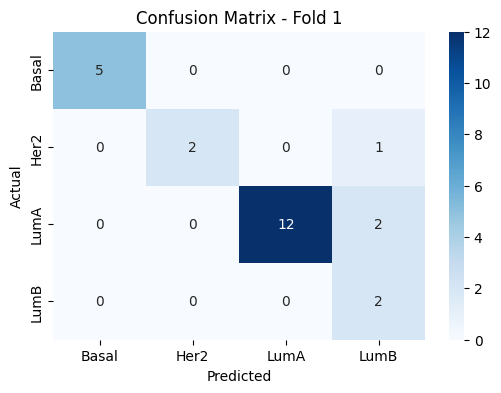


Confusion Matrix for Fold 2:


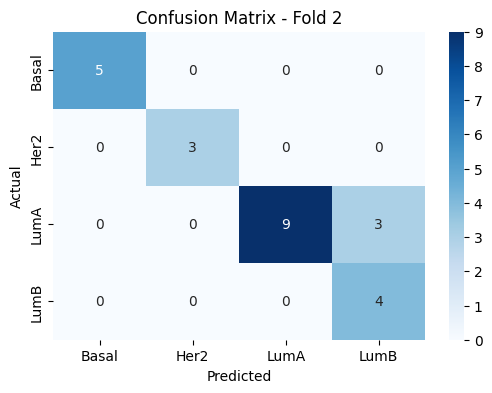


Confusion Matrix for Fold 3:


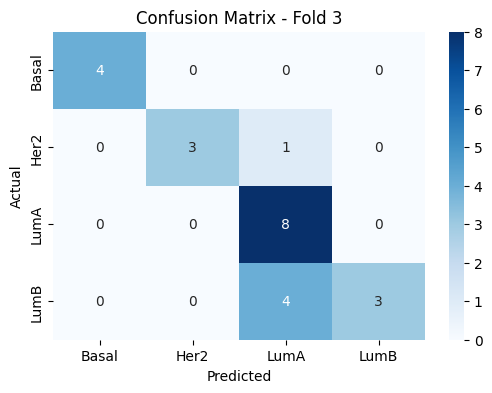


Confusion Matrix for Fold 4:


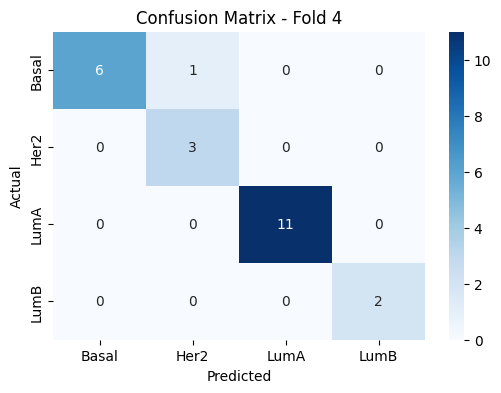


Confusion Matrix for Fold 5:


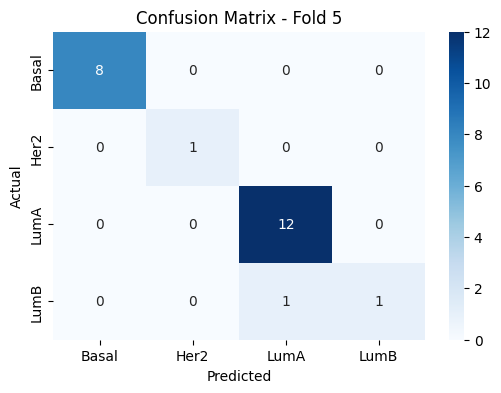

--- LogisticRegression ---
Avg accuracy : 0.889
Avg F1 : 0.875
Avg Recall : 0.913
Avg Precision : 0.89

Aggregated Confusion Matrix:


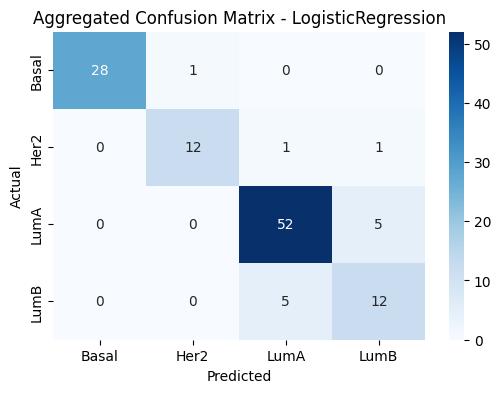

In [15]:
X = df_rfeca.iloc[:, :-1]
y = df_rfeca.iloc[:, -1]

kf = KFold(n_splits=k, shuffle=True, random_state=5)
model = LogisticRegression(random_state=42, max_iter=1000)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_rfeca_lr = []
all_pred_values_rfeca_lr = []
all_y_test_rfeca_lr = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]



    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_rfeca_lr.extend(test_index)
    all_pred_values_rfeca_lr.extend(pred_values)
    all_y_test_rfeca_lr.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values, labels=all_labels))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- LogisticRegression ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - LogisticRegression')
plt.show()

In [ ]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_logistic_rfeca = pd.DataFrame({
    'Model': 'Logistic Regression/RFECA',
    'Original_Index': all_test_indices_rfeca_lr,
    'Actual_Label': all_y_test_rfeca_lr,
    'Predicted_Label': all_pred_values_rfeca_lr
})

# Identify misclassified instances
misclassified_instances_logistic_rfeca = misclassification_analysis_df_logistic_rfeca[misclassification_analysis_df_logistic_rfeca['Actual_Label'] != misclassification_analysis_df_logistic_rfeca['Predicted_Label']]

print("Misclassified Instances by the Logistic Regression Classifier:")
display(misclassified_instances_logistic_rfeca)

print("\nOriginal data for misclassified instances (from df_rfeca):")
display(df_rfeca.loc[misclassified_instances_logistic_rfeca['Original_Index']])

Misclassified Instances by the Logistic Regression Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
11,Logistic Regression/RFECA,52,LumA,LumB
12,Logistic Regression/RFECA,59,LumA,LumB
16,Logistic Regression/RFECA,72,Her2,LumB
34,Logistic Regression/RFECA,49,LumA,LumB
35,Logistic Regression/RFECA,50,LumA,LumB
45,Logistic Regression/RFECA,101,LumA,LumB
51,Logistic Regression/RFECA,19,Her2,LumA
60,Logistic Regression/RFECA,60,LumB,LumA
61,Logistic Regression/RFECA,66,LumB,LumA
65,Logistic Regression/RFECA,85,LumB,LumA



Original data for misclassified instances (from df_rfeca):


,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,CDH3,...,NAT1,PGR,PHGDH,RRM2,SFRP1,SLC39A6,TYMS,UBE2C,UBE2T,PAM50
52,-0.5791,-1.1947,1.7865,0.6370,-0.0883,0.9587,0.0220,0.1659,0.2252,-2.1722,...,1.9781,-1.2631,-0.2871,-0.1273,-3.5615,2.0223,-0.1497,-0.4558,-0.1625,LumA
59,-0.8870,-1.8227,-0.5138,1.4752,1.7175,-1.8498,0.8108,-0.2684,-0.7618,-5.6621,...,-4.2905,-2.4416,0.1971,-0.4120,-3.6992,-1.5783,-1.0274,-1.6596,-1.0941,LumA
72,-0.8758,2.1970,0.0702,-3.2476,2.0931,0.1794,1.1080,0.9723,0.4366,0.1059,...,-1.6165,-3.3547,-1.1842,2.3057,-1.8759,-1.5592,0.4726,0.4806,1.3451,Her2
49,-0.1770,-0.2844,4.3043,1.6278,-0.2830,1.2461,-0.4030,-0.8186,-0.4191,-2.8382,...,4.4564,6.6483,1.4447,0.1624,-3.2176,0.9759,0.8379,-0.2247,-0.3642,LumA
50,-0.6226,-0.2219,0.8540,1.2603,-1.0407,-0.2087,-0.3088,1.8833,-0.5351,-0.0465,...,0.6480,-2.7864,-5.5478,1.7909,-1.8719,0.6504,0.2861,-0.7391,-0.2615,LumA
101,-0.0990,0.1907,1.6040,-1.4810,-0.0992,0.5104,0.2207,1.6779,-0.8417,0.3071,...,6.0855,-0.8283,-1.2691,-0.1146,0.0162,0.3431,0.0178,-0.1081,1.8301,LumA
19,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,1.5543,...,3.3603,5.4023,-0.9886,1.3644,-5.4509,-1.7412,0.0140,0.7328,2.3668,Her2
60,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,-4.4215,...,2.7619,3.7039,0.6414,-1.7443,-5.0341,4.1919,1.6744,-0.3229,0.7071,LumB
66,-0.3573,-0.1113,1.7397,3.9625,2.1530,0.9864,0.3751,0.3975,0.1348,-3.4626,...,4.7865,6.4504,0.0659,0.5895,-1.6146,3.1904,0.0736,1.6315,0.8831,LumB
85,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,-2.6804,...,-0.0606,1.4201,-3.1419,0.3679,0.6072,5.2367,-1.5069,-0.5300,-1.0148,LumB


# Pipeline 2: RFECA + Random Forest


Confusion Matrix for Fold 1:


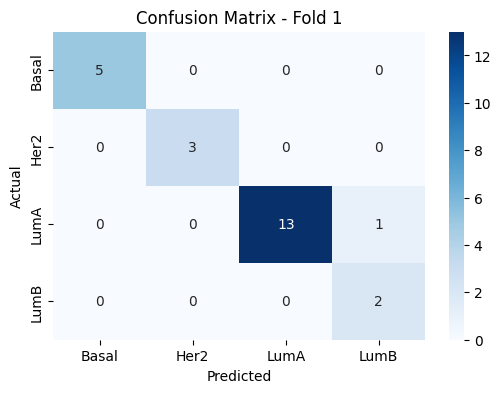


Confusion Matrix for Fold 2:


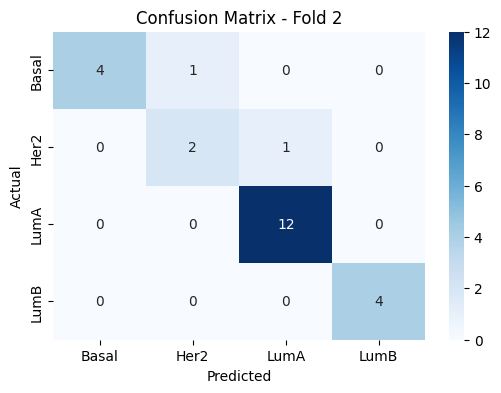


Confusion Matrix for Fold 3:


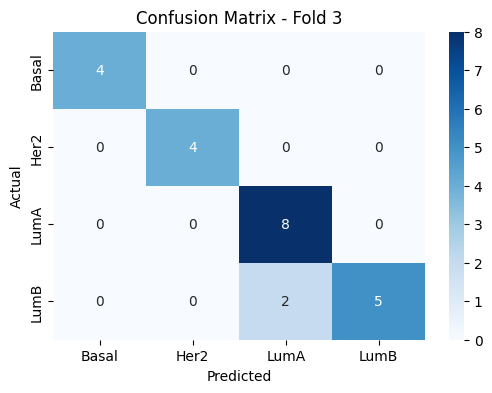


Confusion Matrix for Fold 4:


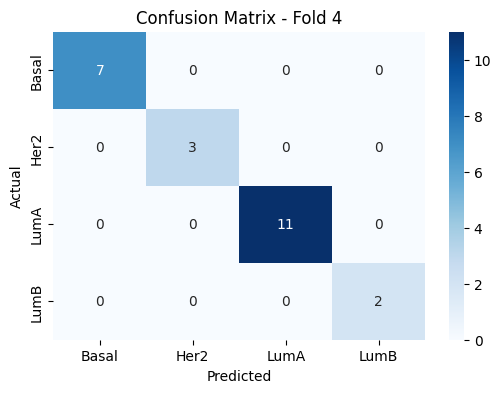


Confusion Matrix for Fold 5:


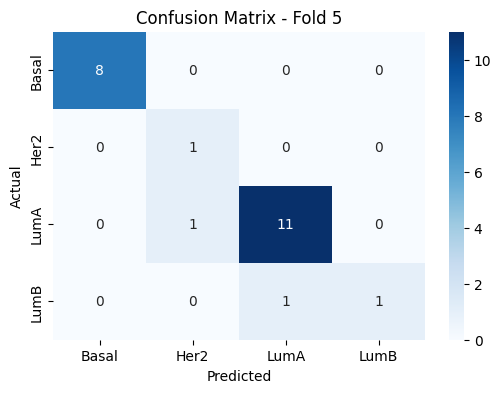

--- RandomForestClassifier ---
Avg accuracy : 0.94
Avg F1 : 0.913
Avg Recall : 0.924
Avg Precision : 0.926

Aggregated Confusion Matrix:


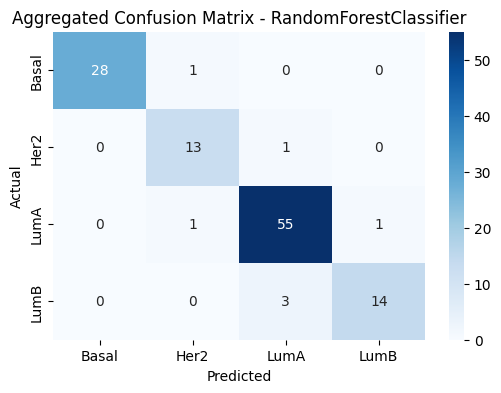

In [17]:
X = df_rfeca.iloc[:, :-1]
y = df_rfeca.iloc[:, -1]

kf = KFold(n_splits=k, shuffle=True, random_state=5)
model = RandomForestClassifier(random_state=42)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_rfeca_rf = []
all_pred_values_rfeca_rf = []
all_y_test_rfeca_rf = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]


    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_rfeca_rf.extend(test_index)
    all_pred_values_rfeca_rf.extend(pred_values)
    all_y_test_rfeca_rf.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- RandomForestClassifier ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - RandomForestClassifier')
plt.show()

In [18]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_rf_rfeca = pd.DataFrame({
    'Model': 'Random Forest/RFECA',
    'Original_Index': all_test_indices_rfeca_rf,
    'Actual_Label': all_y_test_rfeca_rf,
    'Predicted_Label': all_pred_values_rfeca_rf
})

# Identify misclassified instances
misclassified_instances_rf_rfeca = misclassification_analysis_df_rf_rfeca[misclassification_analysis_df_rf_rfeca['Actual_Label'] != misclassification_analysis_df_rf_rfeca['Predicted_Label']]

print("Misclassified Instances by the Random Forest Classifier:")
display(misclassified_instances_rf_rfeca)

print("\nOriginal data for misclassified instances (from df_rfeca):")
display(df_rfeca.loc[misclassified_instances_rf_rfeca['Original_Index']])

Misclassified Instances by the Random Forest Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
21,Random Forest/RFECA,108,LumA,LumB
26,Random Forest/RFECA,22,Her2,LumA
37,Random Forest/RFECA,56,Basal,Her2
60,Random Forest/RFECA,60,LumB,LumA
65,Random Forest/RFECA,85,LumB,LumA
95,Random Forest/RFECA,8,LumA,Her2
110,Random Forest/RFECA,99,LumB,LumA



Original data for misclassified instances (from df_rfeca):


,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,CDH3,...,NAT1,PGR,PHGDH,RRM2,SFRP1,SLC39A6,TYMS,UBE2C,UBE2T,PAM50
108,-1.4394,0.3759,2.5634,-1.4057,1.1095,0.6959,0.2120,-1.5856,1.1844,0.2677,...,4.6276,1.3078,-1.5152,0.1792,0.6630,-0.8256,-1.0824,1.2480,1.1646,LumA
22,-0.1795,-0.2419,0.0352,-4.2793,-0.3635,1.0854,0.5748,0.1214,0.8139,-0.1079,...,-1.4547,-4.0529,-0.1451,1.0933,-2.4218,-1.3208,-0.8357,-0.1466,-0.3473,Her2
56,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,3.6125,...,-3.4479,-1.2348,1.7323,0.5815,1.6929,-1.3043,-1.2413,0.3613,-0.1473,Basal
60,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,-4.4215,...,2.7619,3.7039,0.6414,-1.7443,-5.0341,4.1919,1.6744,-0.3229,0.7071,LumB
85,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,-2.6804,...,-0.0606,1.4201,-3.1419,0.3679,0.6072,5.2367,-1.5069,-0.5300,-1.0148,LumB
8,-0.5472,1.2683,-2.1140,-1.6041,0.6033,1.0847,1.0360,0.1823,0.6905,1.9920,...,0.9446,6.4215,1.5477,-0.0516,0.0892,2.5845,-1.2013,0.3087,1.5750,LumA
99,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,0.3848,...,-0.4319,-3.9340,-1.3295,-0.1818,-6.5061,-1.2984,0.4035,0.4945,-0.1207,LumB


# Pipeline 3: RFECA + SVC


Confusion Matrix for Fold 1:


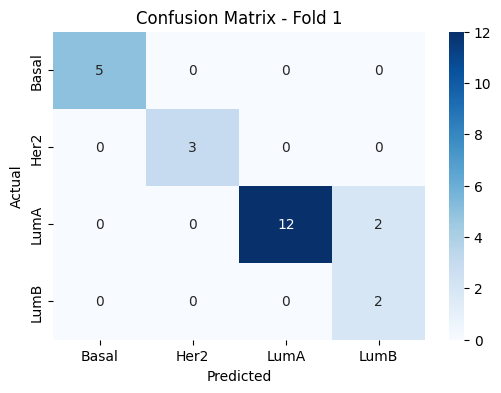


Confusion Matrix for Fold 2:


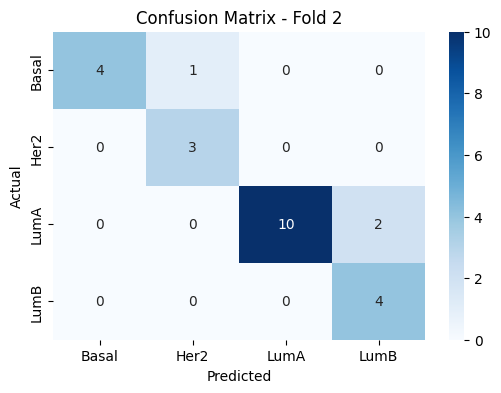


Confusion Matrix for Fold 3:


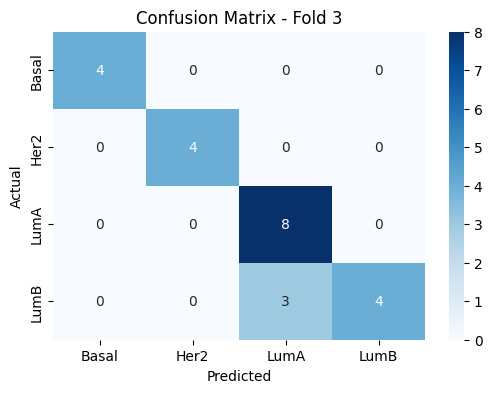


Confusion Matrix for Fold 4:


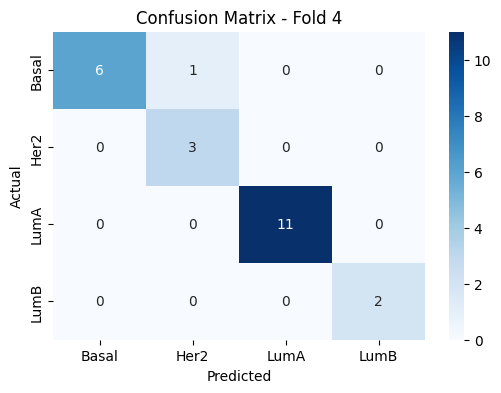


Confusion Matrix for Fold 5:


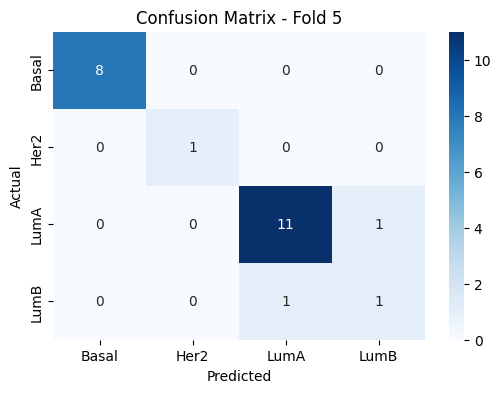

--- SVC ---
Avg accuracy : 0.906
Avg F1 : 0.891
Avg Recall : 0.891
Avg Precision : 0.917

Aggregated Confusion Matrix:


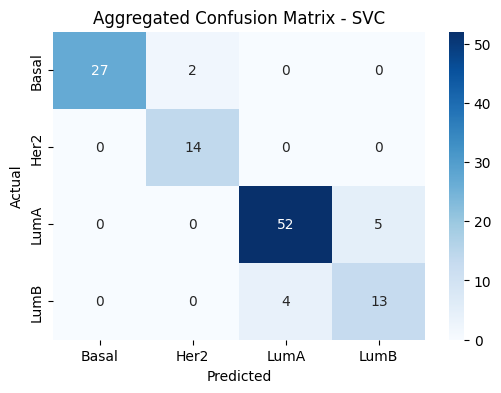

In [19]:
X = df_rfeca.iloc[:, :-1]
y = df_rfeca.iloc[:, -1]

kf = KFold(n_splits=k, shuffle=True, random_state=5)
model = SVC(kernel='linear', random_state=42)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_rfeca_svc = []
all_pred_values_rfeca_svc = []
all_y_test_rfeca_svc = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_rfeca_svc.extend(test_index)
    all_pred_values_rfeca_svc.extend(pred_values)
    all_y_test_rfeca_svc.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- SVC ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - SVC')
plt.show()

In [20]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_svc_rfeca = pd.DataFrame({
    'Model': 'SVC/RFECA',
    'Original_Index': all_test_indices_rfeca_svc,
    'Actual_Label': all_y_test_rfeca_svc,
    'Predicted_Label': all_pred_values_rfeca_svc
})

# Identify misclassified instances
misclassified_instances_svc_rfeca = misclassification_analysis_df_svc_rfeca[misclassification_analysis_df_svc_rfeca['Actual_Label'] != misclassification_analysis_df_svc_rfeca['Predicted_Label']]

print("Misclassified Instances by the SVC Classifier:")
display(misclassified_instances_svc_rfeca)

print("\nOriginal data for misclassified instances (from df_rfeca):")
display(df_rfeca.loc[misclassified_instances_svc_rfeca['Original_Index']])

Misclassified Instances by the SVC Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
11,SVC/RFECA,52,LumA,LumB
12,SVC/RFECA,59,LumA,LumB
35,SVC/RFECA,50,LumA,LumB
37,SVC/RFECA,56,Basal,Her2
45,SVC/RFECA,101,LumA,LumB
60,SVC/RFECA,60,LumB,LumA
61,SVC/RFECA,66,LumB,LumA
65,SVC/RFECA,85,LumB,LumA
74,SVC/RFECA,4,Basal,Her2
95,SVC/RFECA,8,LumA,LumB



Original data for misclassified instances (from df_rfeca):


,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,CDH3,...,NAT1,PGR,PHGDH,RRM2,SFRP1,SLC39A6,TYMS,UBE2C,UBE2T,PAM50
52,-0.5791,-1.1947,1.7865,0.6370,-0.0883,0.9587,0.0220,0.1659,0.2252,-2.1722,...,1.9781,-1.2631,-0.2871,-0.1273,-3.5615,2.0223,-0.1497,-0.4558,-0.1625,LumA
59,-0.8870,-1.8227,-0.5138,1.4752,1.7175,-1.8498,0.8108,-0.2684,-0.7618,-5.6621,...,-4.2905,-2.4416,0.1971,-0.4120,-3.6992,-1.5783,-1.0274,-1.6596,-1.0941,LumA
50,-0.6226,-0.2219,0.8540,1.2603,-1.0407,-0.2087,-0.3088,1.8833,-0.5351,-0.0465,...,0.6480,-2.7864,-5.5478,1.7909,-1.8719,0.6504,0.2861,-0.7391,-0.2615,LumA
56,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,3.6125,...,-3.4479,-1.2348,1.7323,0.5815,1.6929,-1.3043,-1.2413,0.3613,-0.1473,Basal
101,-0.0990,0.1907,1.6040,-1.4810,-0.0992,0.5104,0.2207,1.6779,-0.8417,0.3071,...,6.0855,-0.8283,-1.2691,-0.1146,0.0162,0.3431,0.0178,-0.1081,1.8301,LumA
60,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,-4.4215,...,2.7619,3.7039,0.6414,-1.7443,-5.0341,4.1919,1.6744,-0.3229,0.7071,LumB
66,-0.3573,-0.1113,1.7397,3.9625,2.1530,0.9864,0.3751,0.3975,0.1348,-3.4626,...,4.7865,6.4504,0.0659,0.5895,-1.6146,3.1904,0.0736,1.6315,0.8831,LumB
85,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,-2.6804,...,-0.0606,1.4201,-3.1419,0.3679,0.6072,5.2367,-1.5069,-0.5300,-1.0148,LumB
4,1.7797,2.6335,0.6886,-0.6260,1.9677,-0.6331,3.1293,3.0898,2.8617,-5.5250,...,-2.0927,-5.4469,2.2834,2.1254,-7.3423,-2.8209,2.8119,3.0335,1.9988,Basal
8,-0.5472,1.2683,-2.1140,-1.6041,0.6033,1.0847,1.0360,0.1823,0.6905,1.9920,...,0.9446,6.4215,1.5477,-0.0516,0.0892,2.5845,-1.2013,0.3087,1.5750,LumA


# Pipeline 4: RFECA + Gradient Boosting


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


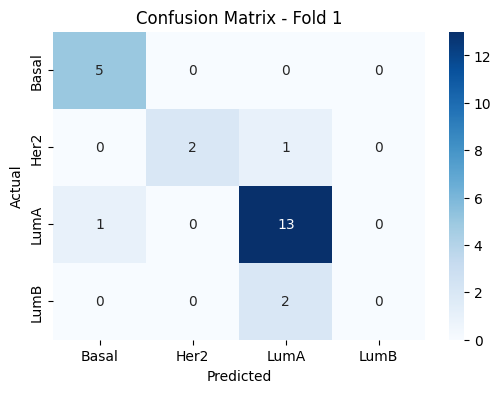


Confusion Matrix for Fold 2:


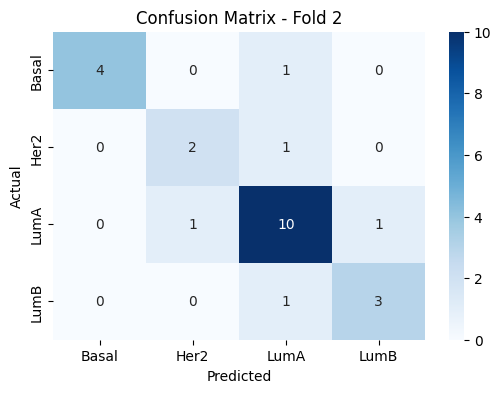


Confusion Matrix for Fold 3:


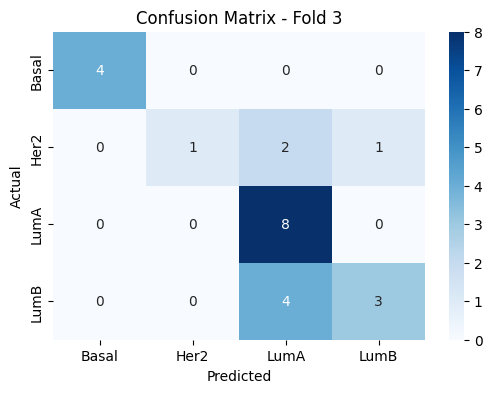


Confusion Matrix for Fold 4:


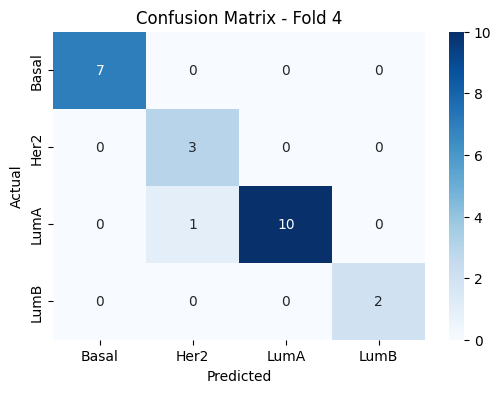


Confusion Matrix for Fold 5:


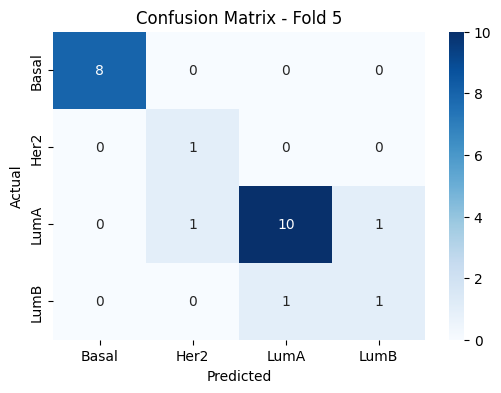

--- GradientBoostingClassifier ---
Avg accuracy : 0.829
Avg F1 : 0.76
Avg Recall : 0.791
Avg Precision : 0.778

Aggregated Confusion Matrix:


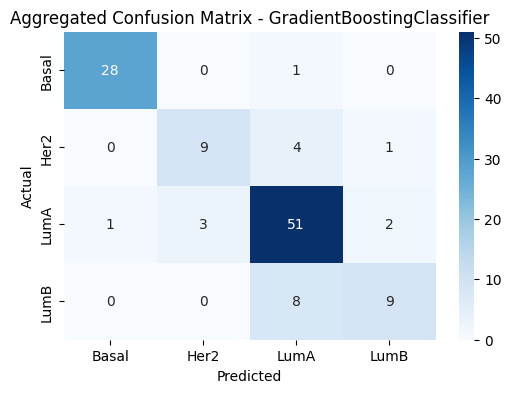

In [21]:
X = df_rfeca.iloc[:, :-1]
y = df_rfeca.iloc[:, -1]

kf = KFold(n_splits=k, shuffle=True, random_state=5)
model = GradientBoostingClassifier(random_state=42)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_rfeca_gb = []
all_pred_values_rfeca_gb = []
all_y_test_rfeca_gb = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]


    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_rfeca_gb.extend(test_index)
    all_pred_values_rfeca_gb.extend(pred_values)
    all_y_test_rfeca_gb.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- GradientBoostingClassifier ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - GradientBoostingClassifier')
plt.show()

In [22]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_gradient_rfeca = pd.DataFrame({
    'Model': 'Gradient Boosting/RFECA',
    'Original_Index': all_test_indices_rfeca_gb,
    'Actual_Label': all_y_test_rfeca_gb,
    'Predicted_Label': all_pred_values_rfeca_gb
})

# Identify misclassified instances
misclassified_instances_gradient_rfeca = misclassification_analysis_df_gradient_rfeca[misclassification_analysis_df_gradient_rfeca['Actual_Label'] != misclassification_analysis_df_gradient_rfeca['Predicted_Label']]

print("Misclassified Instances by the Gradient Boosting Classifier:")
display(misclassified_instances_gradient_rfeca)

print("\nOriginal data for misclassified instances (from df_rfeca):")
display(df_rfeca.loc[misclassified_instances_gradient_rfeca['Original_Index']])

Misclassified Instances by the Gradient Boosting Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
5,Gradient Boosting/RFECA,28,LumB,LumA
16,Gradient Boosting/RFECA,72,Her2,LumA
22,Gradient Boosting/RFECA,113,LumA,Basal
23,Gradient Boosting/RFECA,116,LumB,LumA
32,Gradient Boosting/RFECA,45,Her2,LumA
35,Gradient Boosting/RFECA,50,LumA,LumB
37,Gradient Boosting/RFECA,56,Basal,LumA
41,Gradient Boosting/RFECA,87,LumB,LumA
45,Gradient Boosting/RFECA,101,LumA,Her2
51,Gradient Boosting/RFECA,19,Her2,LumA



Original data for misclassified instances (from df_rfeca):


,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,CDH3,...,NAT1,PGR,PHGDH,RRM2,SFRP1,SLC39A6,TYMS,UBE2C,UBE2T,PAM50
28,0.0086,0.5933,0.6748,3.5583,0.4533,1.0340,-0.7206,0.7217,-0.1911,-0.8437,...,-0.9760,-1.3143,-5.4041,0.3224,-1.3838,5.5891,1.148200,0.6758,1.0293,LumB
72,-0.8758,2.1970,0.0702,-3.2476,2.0931,0.1794,1.1080,0.9723,0.4366,0.1059,...,-1.6165,-3.3547,-1.1842,2.3057,-1.8759,-1.5592,0.472600,0.4806,1.3451,Her2
113,0.6599,-3.5138,0.2944,0.7111,-5.6848,-0.6513,-3.6704,-3.1597,-6.0416,0.2658,...,5.0086,1.5452,-1.5393,-4.5941,6.1585,0.9913,-1.409789,-4.9425,-2.7816,LumA
116,0.8972,0.3492,-0.8944,2.0152,0.6152,0.1253,0.7211,-1.0174,0.7585,-1.9550,...,-0.5897,-3.5401,-4.4392,-0.9754,-2.2038,1.2934,0.668400,0.7983,0.9928,LumB
45,-0.8461,1.2802,-2.4838,-2.7347,-1.0960,0.1373,0.3742,1.2295,-1.2998,-1.5445,...,-2.6577,-2.3490,-3.6078,2.5399,-3.7071,-1.7089,-0.003700,-1.0901,-0.1116,Her2
50,-0.6226,-0.2219,0.8540,1.2603,-1.0407,-0.2087,-0.3088,1.8833,-0.5351,-0.0465,...,0.6480,-2.7864,-5.5478,1.7909,-1.8719,0.6504,0.286100,-0.7391,-0.2615,LumA
56,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,3.6125,...,-3.4479,-1.2348,1.7323,0.5815,1.6929,-1.3043,-1.241300,0.3613,-0.1473,Basal
87,-0.4407,2.1178,-0.7855,-0.1167,1.4519,-0.8742,-0.7657,1.3136,0.4032,-0.1339,...,2.2797,-1.9706,0.6963,1.7457,1.5824,5.1998,-0.312200,1.4293,1.4136,LumB
101,-0.0990,0.1907,1.6040,-1.4810,-0.0992,0.5104,0.2207,1.6779,-0.8417,0.3071,...,6.0855,-0.8283,-1.2691,-0.1146,0.0162,0.3431,0.017800,-0.1081,1.8301,LumA
19,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,1.5543,...,3.3603,5.4023,-0.9886,1.3644,-5.4509,-1.7412,0.014000,0.7328,2.3668,Her2


# Pipeline 5: KNN Impute + Logistic Regression


Confusion Matrix for Fold 1:


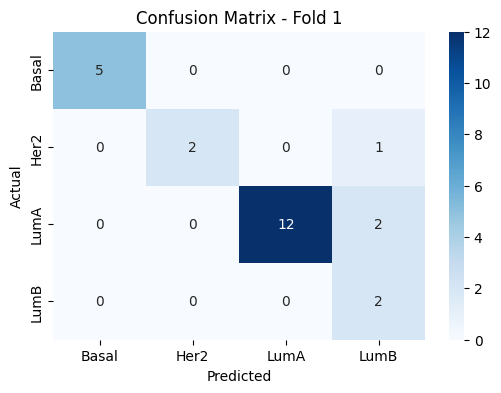


Confusion Matrix for Fold 2:


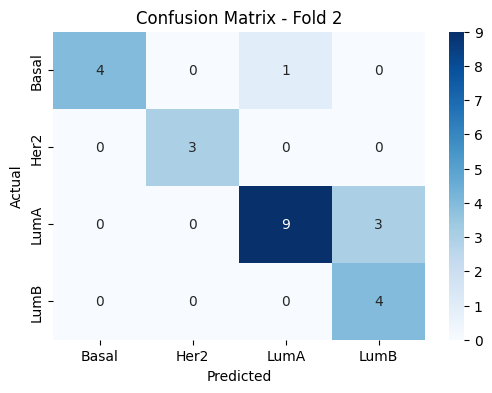


Confusion Matrix for Fold 3:


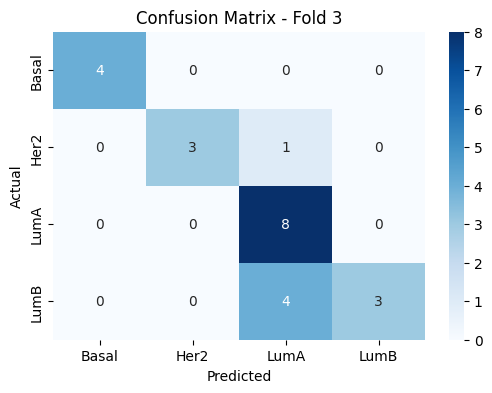


Confusion Matrix for Fold 4:


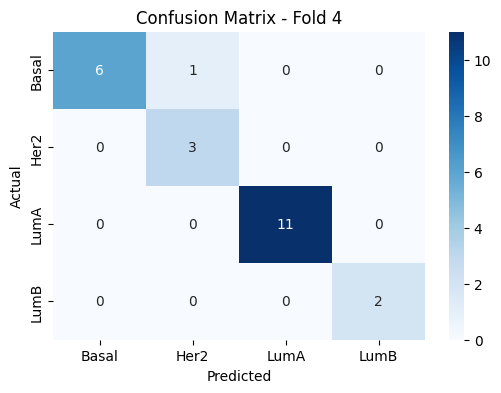


Confusion Matrix for Fold 5:


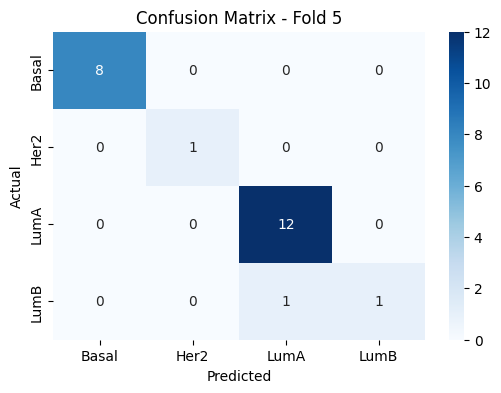

--- LogisticRegression ---
Avg accuracy : 0.881
Avg F1 : 0.868
Avg Recall : 0.908
Avg Precision : 0.88

Aggregated Confusion Matrix:


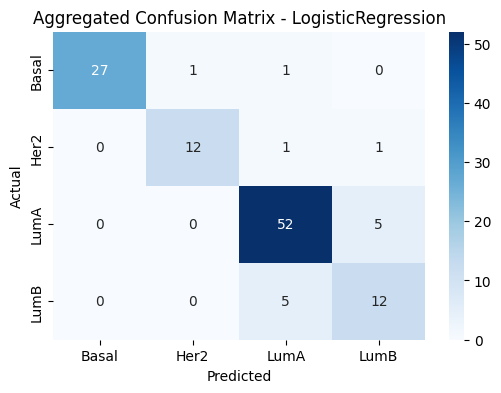

In [23]:
X = df_knn.iloc[:, :-1]
y = df_knn.iloc[:, -1]

kf = KFold(n_splits=k, shuffle=True, random_state=5)
model = LogisticRegression(random_state=42, max_iter=1000)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_knn_lr = []
all_pred_values_knn_lr = []
all_y_test_knn_lr = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_knn_lr.extend(test_index)
    all_pred_values_knn_lr.extend(pred_values)
    all_y_test_knn_lr.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values, labels=all_labels))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- LogisticRegression ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - LogisticRegression')
plt.show()

In [24]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_logistic_knn = pd.DataFrame({
    'Model': 'Logistic Regression/KNN Impute',
    'Original_Index': all_test_indices_knn_lr,
    'Actual_Label': all_y_test_knn_lr,
    'Predicted_Label': all_pred_values_knn_lr
})

# Identify misclassified instances
misclassified_instances_logistic_knn = misclassification_analysis_df_logistic_knn[misclassification_analysis_df_logistic_knn['Actual_Label'] != misclassification_analysis_df_logistic_knn['Predicted_Label']]

print("Misclassified Instances by the Gradient Boosting Classifier:")
display(misclassified_instances_logistic_knn)

print("\nOriginal data for misclassified instances (from df_knn):")
display(df_rfeca.loc[misclassified_instances_logistic_knn['Original_Index']])

Misclassified Instances by the Gradient Boosting Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
11,Logistic Regression/KNN Impute,52,LumA,LumB
12,Logistic Regression/KNN Impute,59,LumA,LumB
16,Logistic Regression/KNN Impute,72,Her2,LumB
34,Logistic Regression/KNN Impute,49,LumA,LumB
35,Logistic Regression/KNN Impute,50,LumA,LumB
37,Logistic Regression/KNN Impute,56,Basal,LumA
45,Logistic Regression/KNN Impute,101,LumA,LumB
51,Logistic Regression/KNN Impute,19,Her2,LumA
60,Logistic Regression/KNN Impute,60,LumB,LumA
61,Logistic Regression/KNN Impute,66,LumB,LumA



Original data for misclassified instances (from df_knn):


,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,CDH3,...,NAT1,PGR,PHGDH,RRM2,SFRP1,SLC39A6,TYMS,UBE2C,UBE2T,PAM50
52,-0.5791,-1.1947,1.7865,0.6370,-0.0883,0.9587,0.0220,0.1659,0.2252,-2.1722,...,1.9781,-1.2631,-0.2871,-0.1273,-3.5615,2.0223,-0.1497,-0.4558,-0.1625,LumA
59,-0.8870,-1.8227,-0.5138,1.4752,1.7175,-1.8498,0.8108,-0.2684,-0.7618,-5.6621,...,-4.2905,-2.4416,0.1971,-0.4120,-3.6992,-1.5783,-1.0274,-1.6596,-1.0941,LumA
72,-0.8758,2.1970,0.0702,-3.2476,2.0931,0.1794,1.1080,0.9723,0.4366,0.1059,...,-1.6165,-3.3547,-1.1842,2.3057,-1.8759,-1.5592,0.4726,0.4806,1.3451,Her2
49,-0.1770,-0.2844,4.3043,1.6278,-0.2830,1.2461,-0.4030,-0.8186,-0.4191,-2.8382,...,4.4564,6.6483,1.4447,0.1624,-3.2176,0.9759,0.8379,-0.2247,-0.3642,LumA
50,-0.6226,-0.2219,0.8540,1.2603,-1.0407,-0.2087,-0.3088,1.8833,-0.5351,-0.0465,...,0.6480,-2.7864,-5.5478,1.7909,-1.8719,0.6504,0.2861,-0.7391,-0.2615,LumA
56,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,3.6125,...,-3.4479,-1.2348,1.7323,0.5815,1.6929,-1.3043,-1.2413,0.3613,-0.1473,Basal
101,-0.0990,0.1907,1.6040,-1.4810,-0.0992,0.5104,0.2207,1.6779,-0.8417,0.3071,...,6.0855,-0.8283,-1.2691,-0.1146,0.0162,0.3431,0.0178,-0.1081,1.8301,LumA
19,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,1.5543,...,3.3603,5.4023,-0.9886,1.3644,-5.4509,-1.7412,0.0140,0.7328,2.3668,Her2
60,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,-4.4215,...,2.7619,3.7039,0.6414,-1.7443,-5.0341,4.1919,1.6744,-0.3229,0.7071,LumB
66,-0.3573,-0.1113,1.7397,3.9625,2.1530,0.9864,0.3751,0.3975,0.1348,-3.4626,...,4.7865,6.4504,0.0659,0.5895,-1.6146,3.1904,0.0736,1.6315,0.8831,LumB


# Pipeline 6: KNN Impute + Random Forest


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


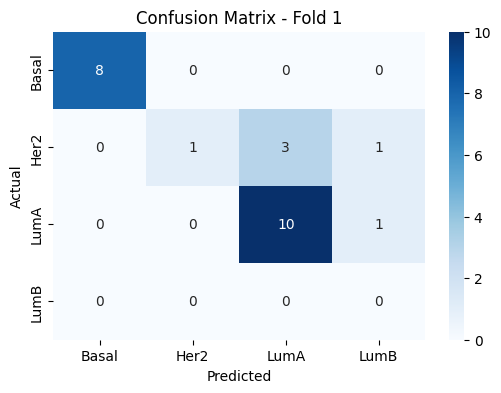


Confusion Matrix for Fold 2:


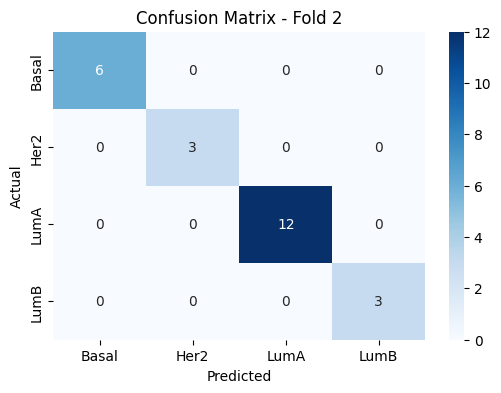


Confusion Matrix for Fold 3:


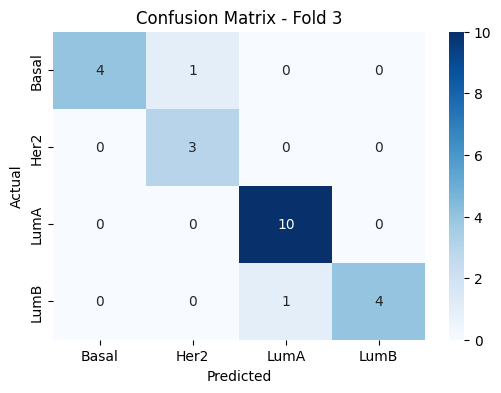


Confusion Matrix for Fold 4:


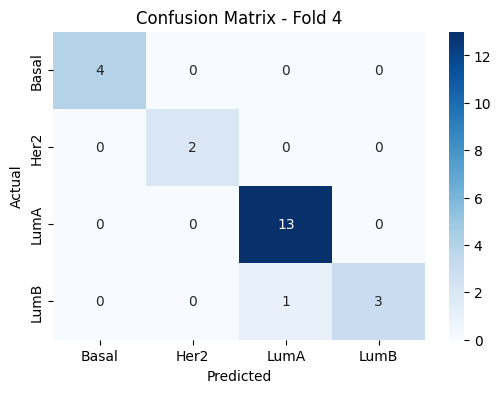


Confusion Matrix for Fold 5:


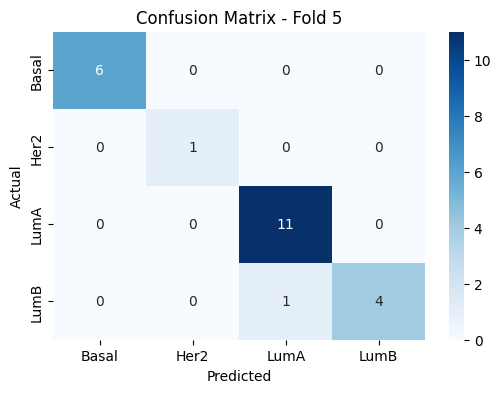

--- RandomForestClassifier ---
Avg accuracy : 0.924
Avg F1 : 0.871
Avg Recall : 0.914
Avg Precision : 0.863

Aggregated Confusion Matrix:


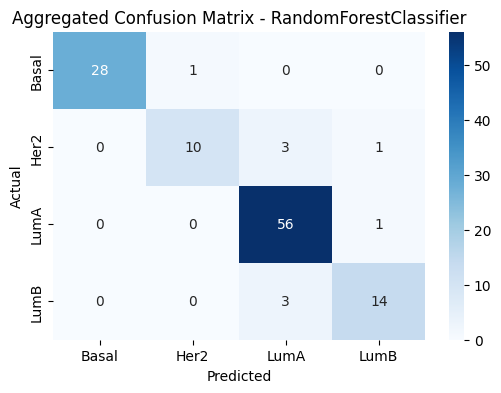

In [25]:
X = df_knn.iloc[:, :-1]
y = df_knn.iloc[:, -1]

kf = KFold(n_splits=k)
model = RandomForestClassifier(random_state=42)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_knn_rf = []
all_pred_values_knn_rf = []
all_y_test_knn_rf = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]


    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_knn_rf.extend(test_index)
    all_pred_values_knn_rf.extend(pred_values)
    all_y_test_knn_rf.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- RandomForestClassifier ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - RandomForestClassifier')
plt.show()

In [26]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_rf_knn = pd.DataFrame({
    'Model': 'Random Forest/KNN Impute',
    'Original_Index': all_test_indices_knn_rf,
    'Actual_Label': all_y_test_knn_rf,
    'Predicted_Label': all_pred_values_knn_rf
})

# Identify misclassified instances
misclassified_instances_rf_knn = misclassification_analysis_df_rf_knn[misclassification_analysis_df_rf_knn['Actual_Label'] != misclassification_analysis_df_rf_knn['Predicted_Label']]

print("Misclassified Instances by the Random Forest Classifier:")
display(misclassified_instances_rf_knn)

print("\nOriginal data for misclassified instances (from df_knn):")
display(df_rfeca.loc[misclassified_instances_rf_knn['Original_Index']])

Misclassified Instances by the Random Forest Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
5,Random Forest/KNN Impute,5,Her2,LumA
8,Random Forest/KNN Impute,8,LumA,LumB
19,Random Forest/KNN Impute,19,Her2,LumB
22,Random Forest/KNN Impute,22,Her2,LumA
23,Random Forest/KNN Impute,23,Her2,LumA
56,Random Forest/KNN Impute,56,Basal,Her2
60,Random Forest/KNN Impute,60,LumB,LumA
85,Random Forest/KNN Impute,85,LumB,LumA
99,Random Forest/KNN Impute,99,LumB,LumA



Original data for misclassified instances (from df_knn):


,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,CDH3,...,NAT1,PGR,PHGDH,RRM2,SFRP1,SLC39A6,TYMS,UBE2C,UBE2T,PAM50
5,-1.6084,2.5970,-1.1292,-3.6968,-0.5029,0.6432,-0.7106,0.8987,0.2932,3.7960,...,-2.2874,-2.8430,1.2391,-0.1891,2.6180,-3.7292,-1.2364,0.3654,-0.2426,Her2
8,-0.5472,1.2683,-2.1140,-1.6041,0.6033,1.0847,1.0360,0.1823,0.6905,1.9920,...,0.9446,6.4215,1.5477,-0.0516,0.0892,2.5845,-1.2013,0.3087,1.5750,LumA
19,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,1.5543,...,3.3603,5.4023,-0.9886,1.3644,-5.4509,-1.7412,0.0140,0.7328,2.3668,Her2
22,-0.1795,-0.2419,0.0352,-4.2793,-0.3635,1.0854,0.5748,0.1214,0.8139,-0.1079,...,-1.4547,-4.0529,-0.1451,1.0933,-2.4218,-1.3208,-0.8357,-0.1466,-0.3473,Her2
23,-1.9026,0.0175,-0.9034,-3.8815,0.1002,0.7659,-0.6464,-0.0741,0.2008,-1.3093,...,-2.8875,-3.4607,-0.2479,0.3567,-2.5423,-3.2600,-1.8346,-1.1085,-1.6808,Her2
56,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,3.6125,...,-3.4479,-1.2348,1.7323,0.5815,1.6929,-1.3043,-1.2413,0.3613,-0.1473,Basal
60,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,-4.4215,...,2.7619,3.7039,0.6414,-1.7443,-5.0341,4.1919,1.6744,-0.3229,0.7071,LumB
85,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,-2.6804,...,-0.0606,1.4201,-3.1419,0.3679,0.6072,5.2367,-1.5069,-0.5300,-1.0148,LumB
99,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,0.3848,...,-0.4319,-3.9340,-1.3295,-0.1818,-6.5061,-1.2984,0.4035,0.4945,-0.1207,LumB


# Pipeline 7: KNN Impute + SVC


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


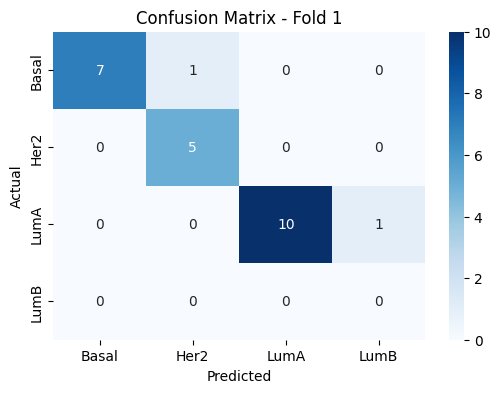


Confusion Matrix for Fold 2:


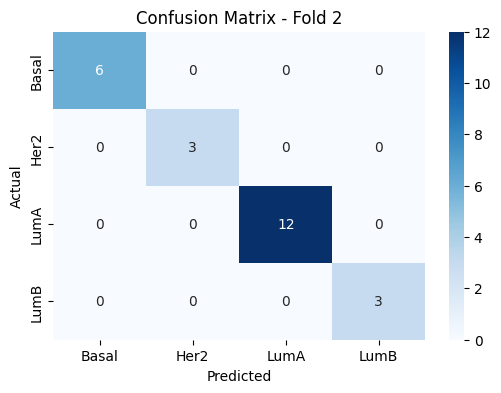


Confusion Matrix for Fold 3:


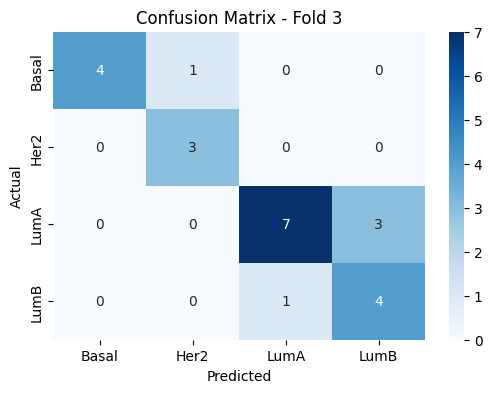


Confusion Matrix for Fold 4:


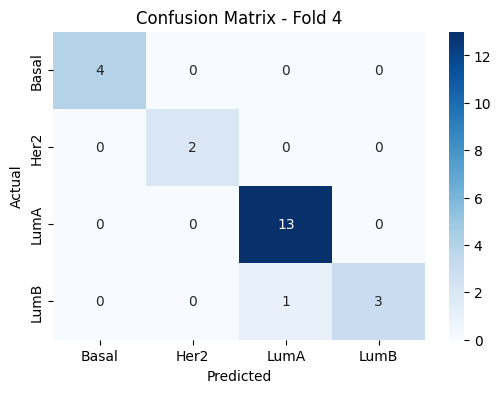


Confusion Matrix for Fold 5:


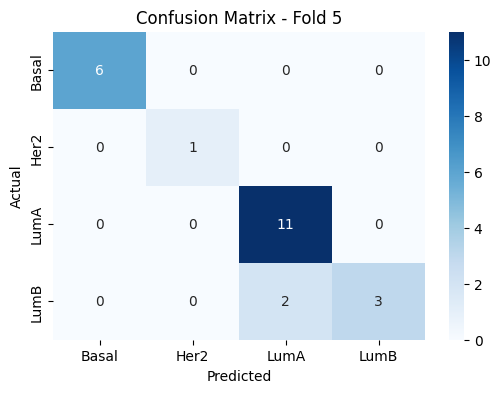

--- SVC ---
Avg accuracy : 0.914
Avg F1 : 0.874
Avg Recall : 0.89
Avg Precision : 0.872

Aggregated Confusion Matrix:


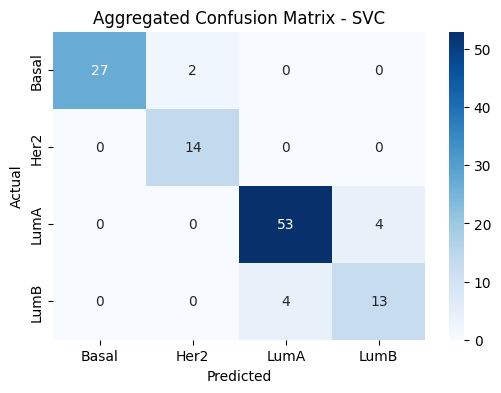

In [27]:
X = df_knn.iloc[:, :-1]
y = df_knn.iloc[:, -1]

kf = KFold(n_splits=k)
model = SVC(kernel='linear')

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_knn_svc = []
all_pred_values_knn_svc = []
all_y_test_knn_svc = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_knn_svc.extend(test_index)
    all_pred_values_knn_svc.extend(pred_values)
    all_y_test_knn_svc.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- SVC ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - SVC')
plt.show()

In [28]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_svc_knn = pd.DataFrame({
    'Model': 'SVC/KNN Impute',
    'Original_Index': all_test_indices_knn_svc,
    'Actual_Label': all_y_test_knn_svc,
    'Predicted_Label': all_pred_values_knn_svc
})

# Identify misclassified instances
misclassified_instances_svc_knn = misclassification_analysis_df_svc_knn[misclassification_analysis_df_svc_knn['Actual_Label'] != misclassification_analysis_df_svc_knn['Predicted_Label']]

print("Misclassified Instances by the SVC Classifier:")
display(misclassified_instances_svc_knn)

print("\nOriginal data for misclassified instances (from df_knn):")
display(df_rfeca.loc[misclassified_instances_svc_knn['Original_Index']])

Misclassified Instances by the SVC Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
4,SVC/KNN Impute,4,Basal,Her2
6,SVC/KNN Impute,6,LumA,LumB
49,SVC/KNN Impute,49,LumA,LumB
50,SVC/KNN Impute,50,LumA,LumB
56,SVC/KNN Impute,56,Basal,Her2
59,SVC/KNN Impute,59,LumA,LumB
60,SVC/KNN Impute,60,LumB,LumA
85,SVC/KNN Impute,85,LumB,LumA
99,SVC/KNN Impute,99,LumB,LumA
103,SVC/KNN Impute,103,LumB,LumA



Original data for misclassified instances (from df_knn):


,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,CDH3,...,NAT1,PGR,PHGDH,RRM2,SFRP1,SLC39A6,TYMS,UBE2C,UBE2T,PAM50
4,1.7797,2.6335,0.6886,-0.6260,1.9677,-0.6331,3.1293,3.0898,2.8617,-5.5250,...,-2.0927,-5.4469,2.2834,2.1254,-7.3423,-2.8209,2.8119,3.0335,1.9988,Basal
6,0.8063,-0.7917,4.3564,1.2913,-0.3401,-0.2884,-0.9016,-2.0727,-0.9598,-3.3099,...,3.5755,4.0778,-3.9077,-0.9697,-7.5622,2.9425,-0.6304,-0.5964,-0.6545,LumA
49,-0.1770,-0.2844,4.3043,1.6278,-0.2830,1.2461,-0.4030,-0.8186,-0.4191,-2.8382,...,4.4564,6.6483,1.4447,0.1624,-3.2176,0.9759,0.8379,-0.2247,-0.3642,LumA
50,-0.6226,-0.2219,0.8540,1.2603,-1.0407,-0.2087,-0.3088,1.8833,-0.5351,-0.0465,...,0.6480,-2.7864,-5.5478,1.7909,-1.8719,0.6504,0.2861,-0.7391,-0.2615,LumA
56,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,3.6125,...,-3.4479,-1.2348,1.7323,0.5815,1.6929,-1.3043,-1.2413,0.3613,-0.1473,Basal
59,-0.8870,-1.8227,-0.5138,1.4752,1.7175,-1.8498,0.8108,-0.2684,-0.7618,-5.6621,...,-4.2905,-2.4416,0.1971,-0.4120,-3.6992,-1.5783,-1.0274,-1.6596,-1.0941,LumA
60,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,-4.4215,...,2.7619,3.7039,0.6414,-1.7443,-5.0341,4.1919,1.6744,-0.3229,0.7071,LumB
85,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,-2.6804,...,-0.0606,1.4201,-3.1419,0.3679,0.6072,5.2367,-1.5069,-0.5300,-1.0148,LumB
99,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,0.3848,...,-0.4319,-3.9340,-1.3295,-0.1818,-6.5061,-1.2984,0.4035,0.4945,-0.1207,LumB
103,0.4291,0.8811,0.7784,-0.1100,1.2932,1.0451,1.7809,-1.2274,0.7539,1.3380,...,4.5786,4.5695,1.0469,-0.1530,-3.5892,3.0704,0.4285,2.3093,1.8881,LumB


# Pipeline 8: KNN Impute + Gradient Boosting


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


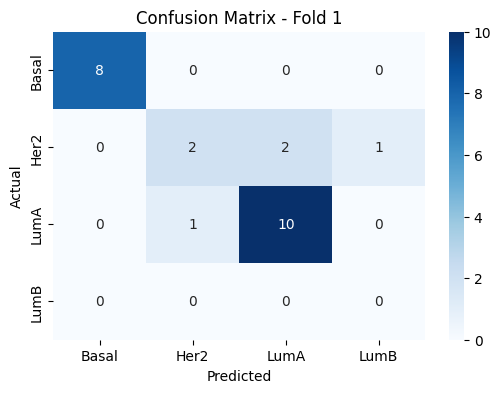


Confusion Matrix for Fold 2:


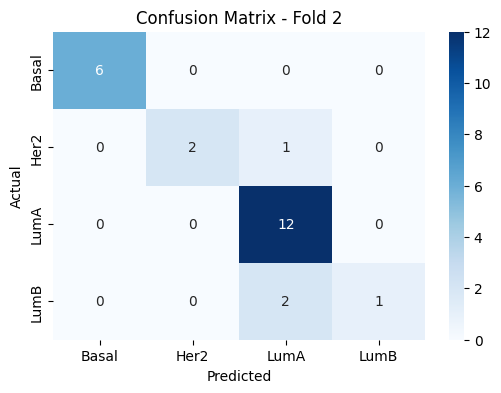


Confusion Matrix for Fold 3:


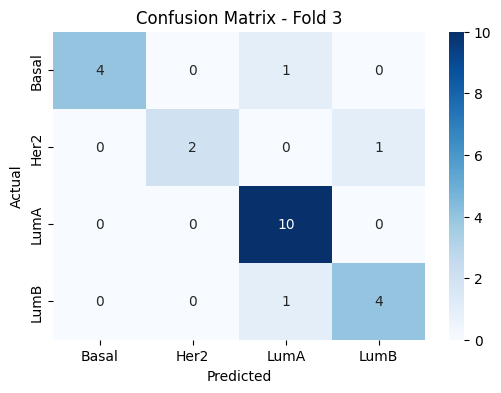


Confusion Matrix for Fold 4:


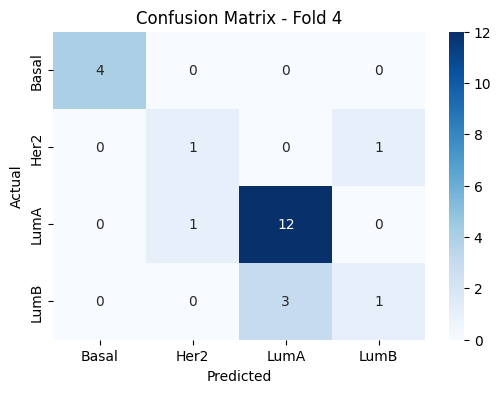


Confusion Matrix for Fold 5:


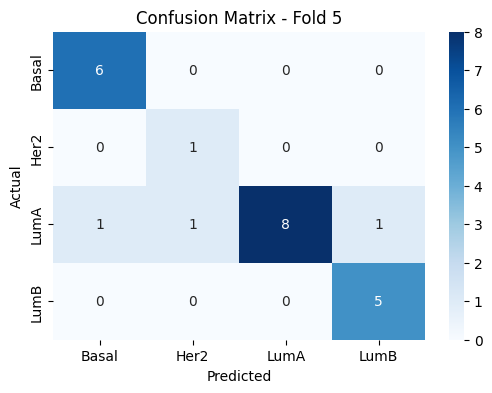

--- GradientBoostingClassifier ---
Avg accuracy : 0.846
Avg F1 : 0.749
Avg Recall : 0.796
Avg Precision : 0.749

Aggregated Confusion Matrix:


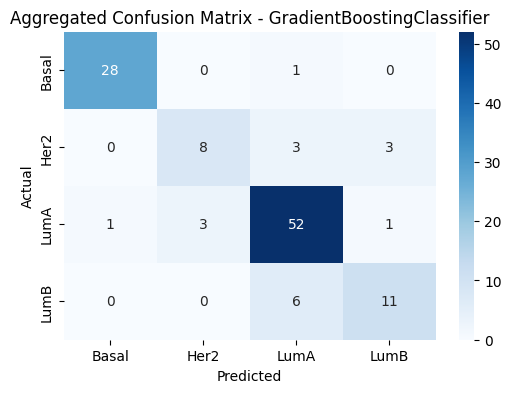

In [29]:
X = df_knn.iloc[:, :-1]
y = df_knn.iloc[:, -1]

kf = KFold(n_splits=k)
model = GradientBoostingClassifier(random_state=42)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_knn_gb = []
all_pred_values_knn_gb = []
all_y_test_knn_gb = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_knn_gb.extend(test_index)
    all_pred_values_knn_gb.extend(pred_values)
    all_y_test_knn_gb.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- GradientBoostingClassifier ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - GradientBoostingClassifier')
plt.show()

In [30]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_gradient_knn = pd.DataFrame({
    'Model': 'Gradient Boosting/KNN Impute',
    'Original_Index': all_test_indices_knn_gb,
    'Actual_Label': all_y_test_knn_gb,
    'Predicted_Label': all_pred_values_knn_gb
})

# Identify misclassified instances
misclassified_instances_gradient_knn = misclassification_analysis_df_gradient_knn[misclassification_analysis_df_gradient_knn['Actual_Label'] != misclassification_analysis_df_gradient_knn['Predicted_Label']]

print("Misclassified Instances by the Gradient Boosting Classifier:")
display(misclassified_instances_gradient_knn)

print("\nOriginal data for misclassified instances (from df_simpleImpute):")
display(df_rfeca.loc[misclassified_instances_gradient_knn['Original_Index']])

Misclassified Instances by the Gradient Boosting Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
5,Gradient Boosting/KNN Impute,5,Her2,LumA
8,Gradient Boosting/KNN Impute,8,LumA,Her2
19,Gradient Boosting/KNN Impute,19,Her2,LumB
23,Gradient Boosting/KNN Impute,23,Her2,LumA
25,Gradient Boosting/KNN Impute,25,LumB,LumA
29,Gradient Boosting/KNN Impute,29,LumB,LumA
45,Gradient Boosting/KNN Impute,45,Her2,LumA
55,Gradient Boosting/KNN Impute,55,Her2,LumB
56,Gradient Boosting/KNN Impute,56,Basal,LumA
60,Gradient Boosting/KNN Impute,60,LumB,LumA



Original data for misclassified instances (from df_simpleImpute):


,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,CDH3,...,NAT1,PGR,PHGDH,RRM2,SFRP1,SLC39A6,TYMS,UBE2C,UBE2T,PAM50
5,-1.6084,2.5970,-1.1292,-3.6968,-0.5029,0.6432,-0.7106,0.8987,0.2932,3.7960,...,-2.2874,-2.8430,1.2391,-0.1891,2.6180,-3.7292,-1.236400,0.3654,-0.2426,Her2
8,-0.5472,1.2683,-2.1140,-1.6041,0.6033,1.0847,1.0360,0.1823,0.6905,1.9920,...,0.9446,6.4215,1.5477,-0.0516,0.0892,2.5845,-1.201300,0.3087,1.5750,LumA
19,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,1.5543,...,3.3603,5.4023,-0.9886,1.3644,-5.4509,-1.7412,0.014000,0.7328,2.3668,Her2
23,-1.9026,0.0175,-0.9034,-3.8815,0.1002,0.7659,-0.6464,-0.0741,0.2008,-1.3093,...,-2.8875,-3.4607,-0.2479,0.3567,-2.5423,-3.2600,-1.834600,-1.1085,-1.6808,Her2
25,0.4840,1.2711,-1.5198,0.3070,1.6021,-0.6270,2.3928,1.1263,1.6842,-1.6373,...,1.2854,6.7125,-3.8553,1.0758,-4.4343,2.2786,1.296700,2.1630,2.8773,LumB
29,-1.3974,1.7338,1.0562,-0.6908,2.6707,1.7734,2.2089,-0.1180,1.2061,-3.3365,...,4.9012,6.1964,-1.8444,1.3588,-4.3305,6.3366,1.431600,2.9002,2.4844,LumB
45,-0.8461,1.2802,-2.4838,-2.7347,-1.0960,0.1373,0.3742,1.2295,-1.2998,-1.5445,...,-2.6577,-2.3490,-3.6078,2.5399,-3.7071,-1.7089,-0.003700,-1.0901,-0.1116,Her2
55,2.8853,2.0305,-1.2658,-2.0503,-0.1489,0.5364,0.5634,1.3081,2.1266,3.0905,...,-3.2343,-4.3480,3.9856,0.7245,1.1755,-2.7097,-0.054600,0.5028,-0.0898,Her2
56,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,3.6125,...,-3.4479,-1.2348,1.7323,0.5815,1.6929,-1.3043,-1.241300,0.3613,-0.1473,Basal
60,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,-4.4215,...,2.7619,3.7039,0.6414,-1.7443,-5.0341,4.1919,1.674400,-0.3229,0.7071,LumB


# Pipeline 9: Simple Impute + Logistic Regression

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix for Fold 1:


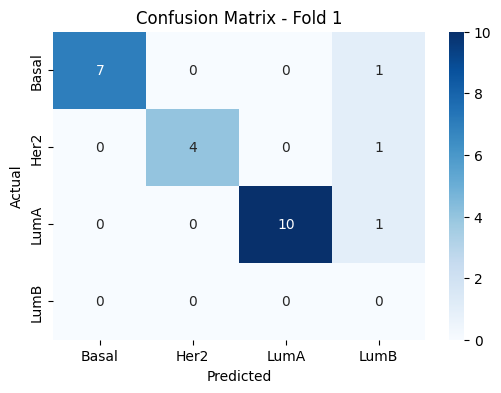


Confusion Matrix for Fold 2:


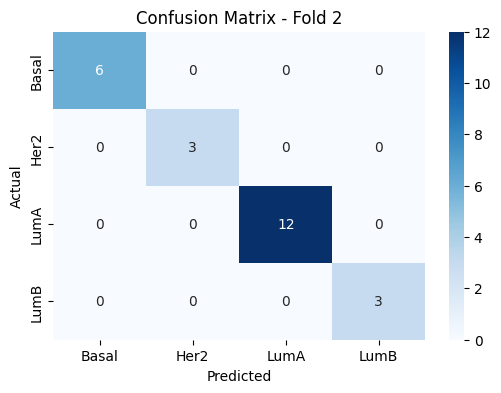


Confusion Matrix for Fold 3:


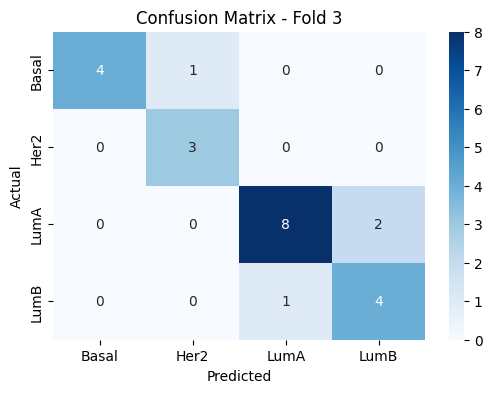


Confusion Matrix for Fold 4:


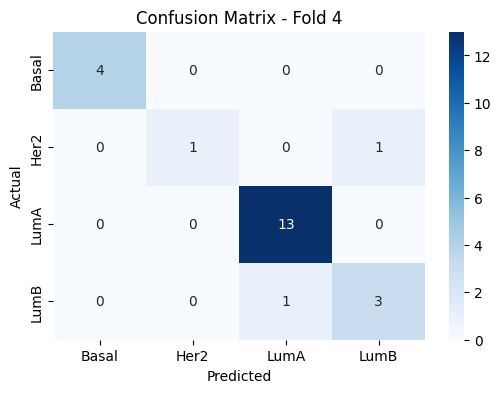


Confusion Matrix for Fold 5:


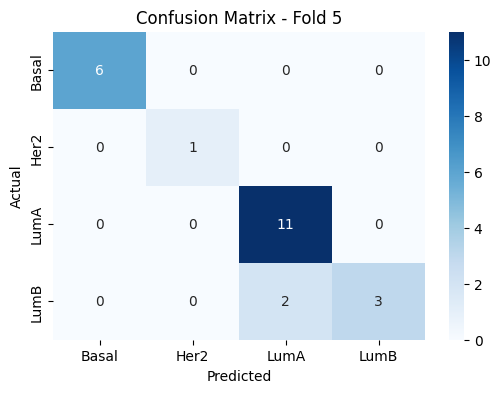

--- LogisticRegression ---
Avg accuracy : 0.905
Avg F1 : 0.857
Avg Recall : 0.892
Avg Precision : 0.842

Aggregated Confusion Matrix:


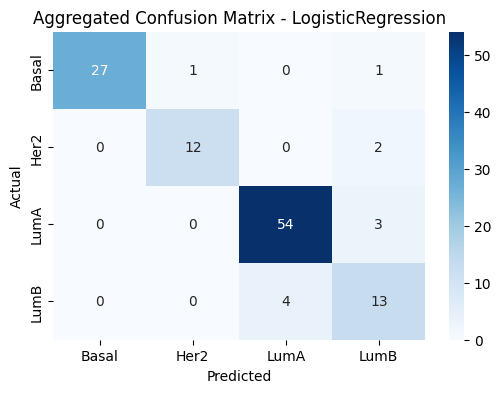

In [31]:
X = df_simpleInpute.iloc[:, :-1]
y = df_simpleInpute.iloc[:, -1]

kf = KFold(n_splits=k)
model = LogisticRegression(random_state=42, max_iter=1000)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_si_lr = []
all_pred_values_si_lr = []
all_y_test_si_lr = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_si_lr.extend(test_index)
    all_pred_values_si_lr.extend(pred_values)
    all_y_test_si_lr.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values, labels=all_labels))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- LogisticRegression ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - LogisticRegression')
plt.show()

In [32]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_logistic_simple = pd.DataFrame({
    'Model': 'Logistic Regression/Simple Impute',
    'Original_Index': all_test_indices_si_lr,
    'Actual_Label': all_y_test_si_lr,
    'Predicted_Label': all_pred_values_si_lr
})

# Identify misclassified instances
misclassified_instances_logistic_simple = misclassification_analysis_df_logistic_simple[misclassification_analysis_df_logistic_simple['Actual_Label'] != misclassification_analysis_df_logistic_simple['Predicted_Label']]

print("Misclassified Instances by the Logistic Regression Classifier:")
display(misclassified_instances_logistic_simple)

print("\nOriginal data for misclassified instances (from df_simpleImpute):")
display(df_rfeca.loc[misclassified_instances_logistic_simple['Original_Index']])

Misclassified Instances by the Logistic Regression Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
4,Logistic Regression/Simple Impute,4,Basal,LumB
6,Logistic Regression/Simple Impute,6,LumA,LumB
19,Logistic Regression/Simple Impute,19,Her2,LumB
49,Logistic Regression/Simple Impute,49,LumA,LumB
56,Logistic Regression/Simple Impute,56,Basal,Her2
59,Logistic Regression/Simple Impute,59,LumA,LumB
60,Logistic Regression/Simple Impute,60,LumB,LumA
72,Logistic Regression/Simple Impute,72,Her2,LumB
85,Logistic Regression/Simple Impute,85,LumB,LumA
99,Logistic Regression/Simple Impute,99,LumB,LumA



Original data for misclassified instances (from df_simpleImpute):


,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,CDH3,...,NAT1,PGR,PHGDH,RRM2,SFRP1,SLC39A6,TYMS,UBE2C,UBE2T,PAM50
4,1.7797,2.6335,0.6886,-0.6260,1.9677,-0.6331,3.1293,3.0898,2.8617,-5.5250,...,-2.0927,-5.4469,2.2834,2.1254,-7.3423,-2.8209,2.8119,3.0335,1.9988,Basal
6,0.8063,-0.7917,4.3564,1.2913,-0.3401,-0.2884,-0.9016,-2.0727,-0.9598,-3.3099,...,3.5755,4.0778,-3.9077,-0.9697,-7.5622,2.9425,-0.6304,-0.5964,-0.6545,LumA
19,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,1.5543,...,3.3603,5.4023,-0.9886,1.3644,-5.4509,-1.7412,0.0140,0.7328,2.3668,Her2
49,-0.1770,-0.2844,4.3043,1.6278,-0.2830,1.2461,-0.4030,-0.8186,-0.4191,-2.8382,...,4.4564,6.6483,1.4447,0.1624,-3.2176,0.9759,0.8379,-0.2247,-0.3642,LumA
56,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,3.6125,...,-3.4479,-1.2348,1.7323,0.5815,1.6929,-1.3043,-1.2413,0.3613,-0.1473,Basal
59,-0.8870,-1.8227,-0.5138,1.4752,1.7175,-1.8498,0.8108,-0.2684,-0.7618,-5.6621,...,-4.2905,-2.4416,0.1971,-0.4120,-3.6992,-1.5783,-1.0274,-1.6596,-1.0941,LumA
60,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,-4.4215,...,2.7619,3.7039,0.6414,-1.7443,-5.0341,4.1919,1.6744,-0.3229,0.7071,LumB
72,-0.8758,2.1970,0.0702,-3.2476,2.0931,0.1794,1.1080,0.9723,0.4366,0.1059,...,-1.6165,-3.3547,-1.1842,2.3057,-1.8759,-1.5592,0.4726,0.4806,1.3451,Her2
85,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,-2.6804,...,-0.0606,1.4201,-3.1419,0.3679,0.6072,5.2367,-1.5069,-0.5300,-1.0148,LumB
99,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,0.3848,...,-0.4319,-3.9340,-1.3295,-0.1818,-6.5061,-1.2984,0.4035,0.4945,-0.1207,LumB


# Pipeline 10: Simple Impute + Random Forest


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


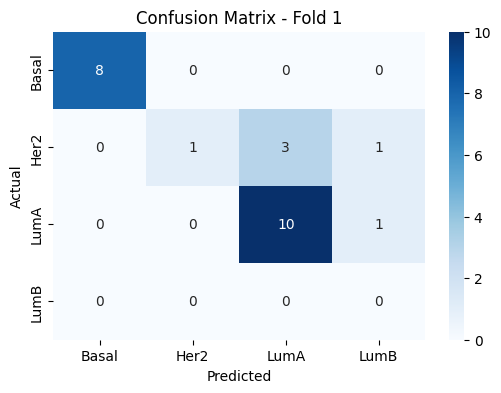


Confusion Matrix for Fold 2:


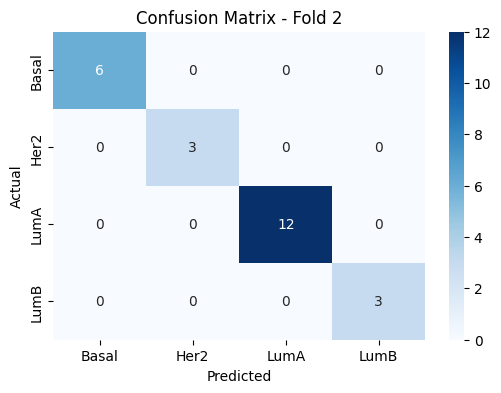


Confusion Matrix for Fold 3:


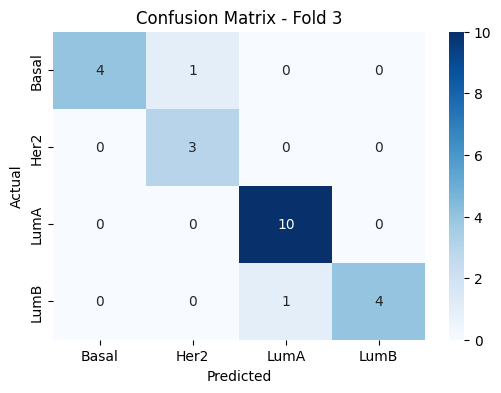


Confusion Matrix for Fold 4:


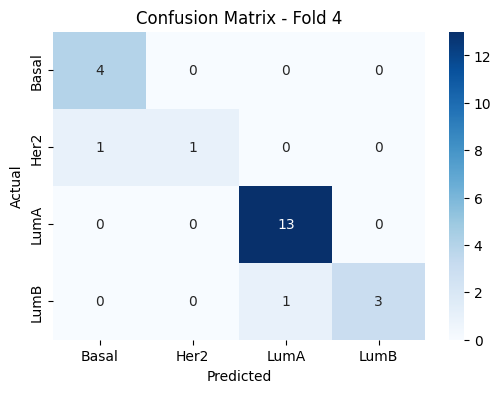


Confusion Matrix for Fold 5:


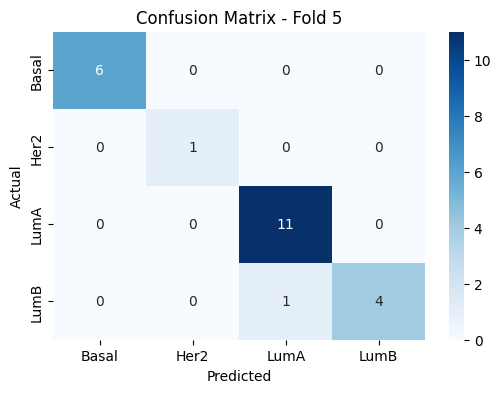

--- RandomForestClassifier ---
Avg accuracy : 0.915
Avg F1 : 0.849
Avg Recall : 0.904
Avg Precision : 0.838

Aggregated Confusion Matrix:


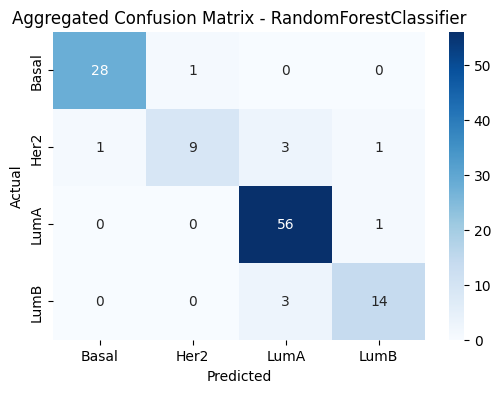

In [33]:
X = df_simpleInpute.iloc[:, :-1]
y = df_simpleInpute.iloc[:, -1]

kf = KFold(n_splits=k)
model = RandomForestClassifier(random_state=42)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_si_rf = []
all_pred_values_si_rf = []
all_y_test_si_rf = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]


    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_si_rf.extend(test_index)
    all_pred_values_si_rf.extend(pred_values)
    all_y_test_si_rf.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- RandomForestClassifier ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))
#print('accuracy of each fold - {}'.format(acc_score))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - RandomForestClassifier')
plt.show()

In [34]:
# Create a DataFrame to easily compare actual and predicted values with original indices
misclassification_analysis_df_rf_simple = pd.DataFrame({
    'Model': 'Random Forest/Simple Impute',
    'Original_Index': all_test_indices_si_rf,
    'Actual_Label': all_y_test_si_rf,
    'Predicted_Label': all_pred_values_si_rf
})

# Identify misclassified instances
misclassified_instances_rf_simple = misclassification_analysis_df_rf_simple[misclassification_analysis_df_rf_simple['Actual_Label'] != misclassification_analysis_df_rf_simple['Predicted_Label']]

print("Misclassified Instances by the Random Forest Classifier:")
display(misclassified_instances_rf_simple)

print("\nOriginal data for misclassified instances (from df_simpleImpute):")
display(df_rfeca.loc[misclassified_instances_rf_simple['Original_Index']])

Misclassified Instances by the Random Forest Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
5,Random Forest/Simple Impute,5,Her2,LumA
8,Random Forest/Simple Impute,8,LumA,LumB
19,Random Forest/Simple Impute,19,Her2,LumB
22,Random Forest/Simple Impute,22,Her2,LumA
23,Random Forest/Simple Impute,23,Her2,LumA
56,Random Forest/Simple Impute,56,Basal,Her2
60,Random Forest/Simple Impute,60,LumB,LumA
72,Random Forest/Simple Impute,72,Her2,Basal
85,Random Forest/Simple Impute,85,LumB,LumA
99,Random Forest/Simple Impute,99,LumB,LumA



Original data for misclassified instances (from df_simpleImpute):


,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,CDH3,...,NAT1,PGR,PHGDH,RRM2,SFRP1,SLC39A6,TYMS,UBE2C,UBE2T,PAM50
5,-1.6084,2.5970,-1.1292,-3.6968,-0.5029,0.6432,-0.7106,0.8987,0.2932,3.7960,...,-2.2874,-2.8430,1.2391,-0.1891,2.6180,-3.7292,-1.2364,0.3654,-0.2426,Her2
8,-0.5472,1.2683,-2.1140,-1.6041,0.6033,1.0847,1.0360,0.1823,0.6905,1.9920,...,0.9446,6.4215,1.5477,-0.0516,0.0892,2.5845,-1.2013,0.3087,1.5750,LumA
19,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,1.5543,...,3.3603,5.4023,-0.9886,1.3644,-5.4509,-1.7412,0.0140,0.7328,2.3668,Her2
22,-0.1795,-0.2419,0.0352,-4.2793,-0.3635,1.0854,0.5748,0.1214,0.8139,-0.1079,...,-1.4547,-4.0529,-0.1451,1.0933,-2.4218,-1.3208,-0.8357,-0.1466,-0.3473,Her2
23,-1.9026,0.0175,-0.9034,-3.8815,0.1002,0.7659,-0.6464,-0.0741,0.2008,-1.3093,...,-2.8875,-3.4607,-0.2479,0.3567,-2.5423,-3.2600,-1.8346,-1.1085,-1.6808,Her2
56,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,3.6125,...,-3.4479,-1.2348,1.7323,0.5815,1.6929,-1.3043,-1.2413,0.3613,-0.1473,Basal
60,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,-4.4215,...,2.7619,3.7039,0.6414,-1.7443,-5.0341,4.1919,1.6744,-0.3229,0.7071,LumB
72,-0.8758,2.1970,0.0702,-3.2476,2.0931,0.1794,1.1080,0.9723,0.4366,0.1059,...,-1.6165,-3.3547,-1.1842,2.3057,-1.8759,-1.5592,0.4726,0.4806,1.3451,Her2
85,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,-2.6804,...,-0.0606,1.4201,-3.1419,0.3679,0.6072,5.2367,-1.5069,-0.5300,-1.0148,LumB
99,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,0.3848,...,-0.4319,-3.9340,-1.3295,-0.1818,-6.5061,-1.2984,0.4035,0.4945,-0.1207,LumB


# Pipeline 11: Simple Impute + SVC


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


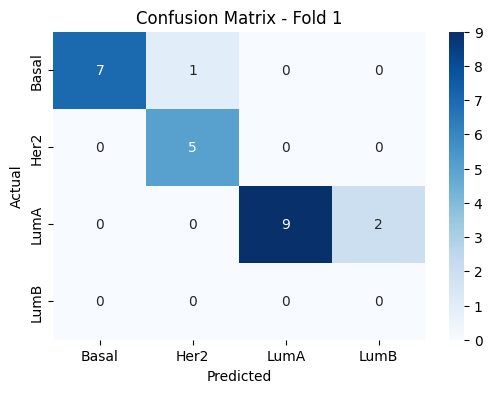


Confusion Matrix for Fold 2:


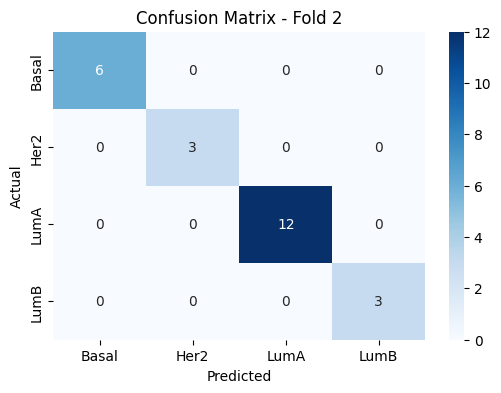


Confusion Matrix for Fold 3:


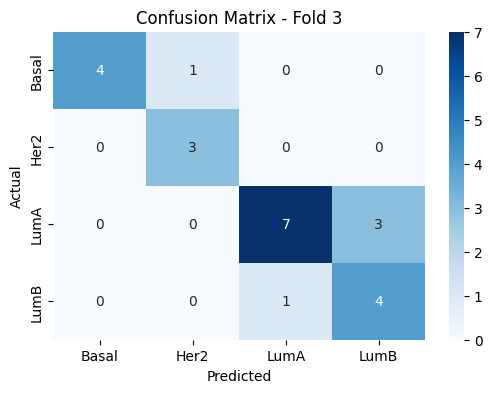


Confusion Matrix for Fold 4:


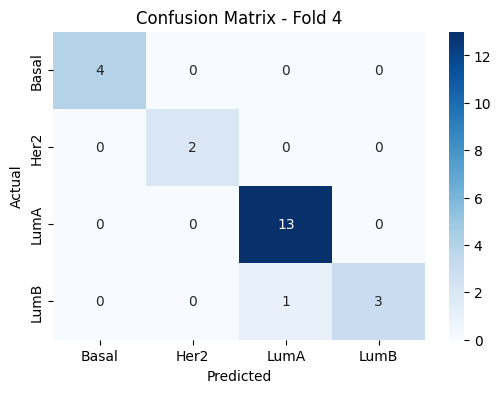


Confusion Matrix for Fold 5:


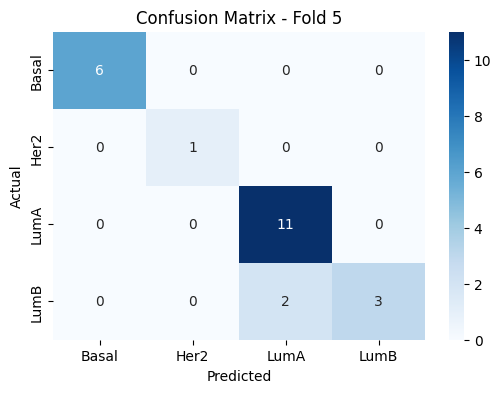

--- SVC ---
Avg accuracy : 0.905
Avg F1 : 0.871
Avg Recall : 0.89
Avg Precision : 0.867

Aggregated Confusion Matrix:


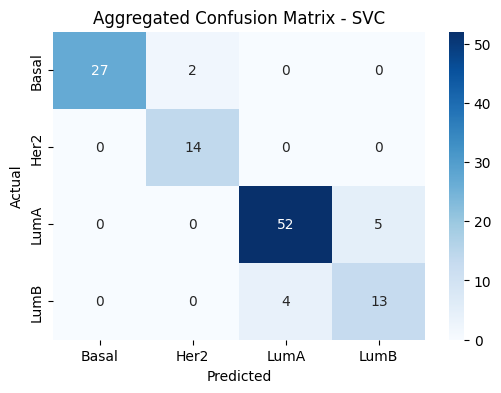

In [35]:
X = df_simpleInpute.iloc[:, :-1]
y = df_simpleInpute.iloc[:, -1]

kf = KFold(n_splits=k)
model = SVC(kernel='linear')

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_si_svc = []
all_pred_values_si_svc = []
all_y_test_si_svc = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_si_svc.extend(test_index)
    all_pred_values_si_svc.extend(pred_values)
    all_y_test_si_svc.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- SVC ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - SVC')
plt.show()

In [36]:
misclassification_analysis_df_svc_simple = pd.DataFrame({
    'Model': 'SVC/Simple Impute',
    'Original_Index': all_test_indices_si_svc,
    'Actual_Label': all_y_test_si_svc,
    'Predicted_Label': all_pred_values_si_svc
})

misclassified_instances_svc_simple = misclassification_analysis_df_svc_simple[misclassification_analysis_df_svc_simple['Actual_Label'] != misclassification_analysis_df_svc_simple['Predicted_Label']]

print("Misclassified Instances by the SVC:")
display(misclassified_instances_svc_simple)

print("\nOriginal data for misclassified instances (from df_simpleImpute):")
display(df_rfeca.loc[misclassified_instances_svc_simple['Original_Index']])

Misclassified Instances by the SVC:


,Model,Original_Index,Actual_Label,Predicted_Label
4,SVC/Simple Impute,4,Basal,Her2
6,SVC/Simple Impute,6,LumA,LumB
8,SVC/Simple Impute,8,LumA,LumB
49,SVC/Simple Impute,49,LumA,LumB
50,SVC/Simple Impute,50,LumA,LumB
56,SVC/Simple Impute,56,Basal,Her2
59,SVC/Simple Impute,59,LumA,LumB
60,SVC/Simple Impute,60,LumB,LumA
85,SVC/Simple Impute,85,LumB,LumA
99,SVC/Simple Impute,99,LumB,LumA



Original data for misclassified instances (from df_simpleImpute):


,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,CDH3,...,NAT1,PGR,PHGDH,RRM2,SFRP1,SLC39A6,TYMS,UBE2C,UBE2T,PAM50
4,1.7797,2.6335,0.6886,-0.6260,1.9677,-0.6331,3.1293,3.0898,2.8617,-5.5250,...,-2.0927,-5.4469,2.2834,2.1254,-7.3423,-2.8209,2.8119,3.0335,1.9988,Basal
6,0.8063,-0.7917,4.3564,1.2913,-0.3401,-0.2884,-0.9016,-2.0727,-0.9598,-3.3099,...,3.5755,4.0778,-3.9077,-0.9697,-7.5622,2.9425,-0.6304,-0.5964,-0.6545,LumA
8,-0.5472,1.2683,-2.1140,-1.6041,0.6033,1.0847,1.0360,0.1823,0.6905,1.9920,...,0.9446,6.4215,1.5477,-0.0516,0.0892,2.5845,-1.2013,0.3087,1.5750,LumA
49,-0.1770,-0.2844,4.3043,1.6278,-0.2830,1.2461,-0.4030,-0.8186,-0.4191,-2.8382,...,4.4564,6.6483,1.4447,0.1624,-3.2176,0.9759,0.8379,-0.2247,-0.3642,LumA
50,-0.6226,-0.2219,0.8540,1.2603,-1.0407,-0.2087,-0.3088,1.8833,-0.5351,-0.0465,...,0.6480,-2.7864,-5.5478,1.7909,-1.8719,0.6504,0.2861,-0.7391,-0.2615,LumA
56,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,3.6125,...,-3.4479,-1.2348,1.7323,0.5815,1.6929,-1.3043,-1.2413,0.3613,-0.1473,Basal
59,-0.8870,-1.8227,-0.5138,1.4752,1.7175,-1.8498,0.8108,-0.2684,-0.7618,-5.6621,...,-4.2905,-2.4416,0.1971,-0.4120,-3.6992,-1.5783,-1.0274,-1.6596,-1.0941,LumA
60,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,-4.4215,...,2.7619,3.7039,0.6414,-1.7443,-5.0341,4.1919,1.6744,-0.3229,0.7071,LumB
85,-1.2716,1.3239,3.7692,-0.1800,0.2532,1.5107,-0.2840,0.6173,-0.9331,-2.6804,...,-0.0606,1.4201,-3.1419,0.3679,0.6072,5.2367,-1.5069,-0.5300,-1.0148,LumB
99,0.0712,-1.1850,0.3992,0.1573,0.4467,0.4001,-0.2632,-0.1641,0.2846,0.3848,...,-0.4319,-3.9340,-1.3295,-0.1818,-6.5061,-1.2984,0.4035,0.4945,-0.1207,LumB


# Pipeline 12: Simple Impute + Gradient Boosting


Confusion Matrix for Fold 1:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


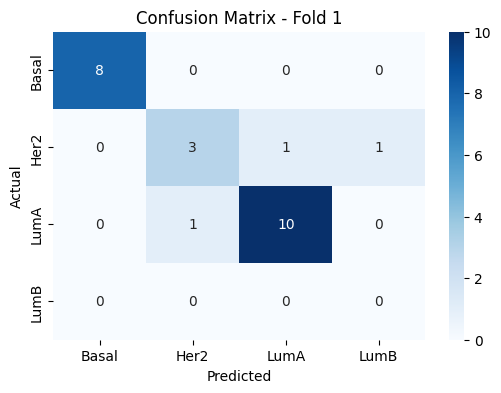


Confusion Matrix for Fold 2:


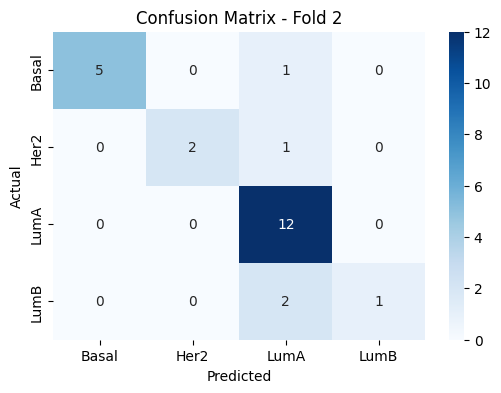


Confusion Matrix for Fold 3:


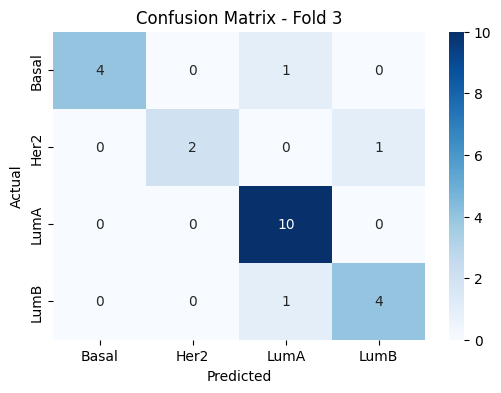


Confusion Matrix for Fold 4:


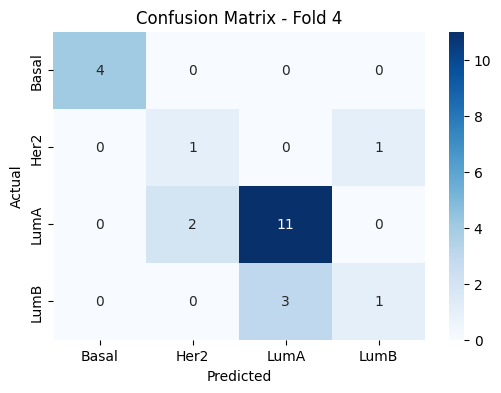


Confusion Matrix for Fold 5:


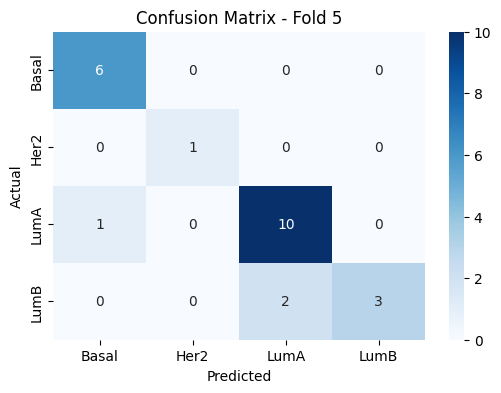

--- GradientBoostingClassifier ---
Avg accuracy : 0.837
Avg F1 : 0.757
Avg Recall : 0.818
Avg Precision : 0.736

Aggregated Confusion Matrix:


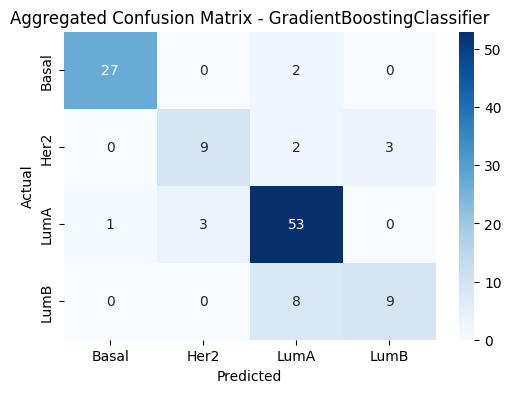

In [37]:
X = df_simpleInpute.iloc[:, :-1]
y = df_simpleInpute.iloc[:, -1]

kf = KFold(n_splits=k)
model = GradientBoostingClassifier(random_state=42)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_test_indices_si_gb = []
all_pred_values_si_gb = []
all_y_test_si_gb = []

all_labels = sorted(y.unique())

for fold, (train_index , test_index) in enumerate(kf.split(X)):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]


    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    all_test_indices_si_gb.extend(test_index)
    all_pred_values_si_gb.extend(pred_values)
    all_y_test_si_gb.extend(y_test)

    acc_score.append(accuracy_score(pred_values , y_test))
    f1_score_.append(f1_score(pred_values, y_test, average='macro'))
    recall_score_.append(recall_score(pred_values, y_test, average='macro'))
    precision_score_.append(precision_score(pred_values, y_test, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, pred_values))

    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- GradientBoostingClassifier ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - GradientBoostingClassifier')
plt.show()

In [38]:
misclassification_analysis_df_gradient_simple = pd.DataFrame({
    'Model': 'Gradient Boosting/Simple Impute',
    'Original_Index': all_test_indices_si_gb,
    'Actual_Label': all_y_test_si_gb,
    'Predicted_Label': all_pred_values_si_gb
})

misclassified_instances_gradient_simple = misclassification_analysis_df_gradient_simple[misclassification_analysis_df_gradient_simple['Actual_Label'] != misclassification_analysis_df_gradient_simple['Predicted_Label']]

print("Misclassified Instances by the Gradient Boosting Classifier:")
display(misclassified_instances_gradient_simple)

print("\nOriginal data for misclassified instances (from df_simpleImpute):")
display(df_rfeca.loc[misclassified_instances_gradient_simple['Original_Index']])

Misclassified Instances by the Gradient Boosting Classifier:


,Model,Original_Index,Actual_Label,Predicted_Label
8,Gradient Boosting/Simple Impute,8,LumA,Her2
19,Gradient Boosting/Simple Impute,19,Her2,LumB
23,Gradient Boosting/Simple Impute,23,Her2,LumA
25,Gradient Boosting/Simple Impute,25,LumB,LumA
29,Gradient Boosting/Simple Impute,29,LumB,LumA
32,Gradient Boosting/Simple Impute,32,Basal,LumA
45,Gradient Boosting/Simple Impute,45,Her2,LumA
55,Gradient Boosting/Simple Impute,55,Her2,LumB
56,Gradient Boosting/Simple Impute,56,Basal,LumA
60,Gradient Boosting/Simple Impute,60,LumB,LumA



Original data for misclassified instances (from df_simpleImpute):


,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,CDC20,CDH3,...,NAT1,PGR,PHGDH,RRM2,SFRP1,SLC39A6,TYMS,UBE2C,UBE2T,PAM50
8,-0.5472,1.2683,-2.1140,-1.6041,0.6033,1.0847,1.0360,0.1823,0.6905,1.9920,...,0.9446,6.4215,1.5477,-0.0516,0.0892,2.5845,-1.201300,0.3087,1.5750,LumA
19,-0.0261,2.1216,-0.8597,-0.7558,0.2576,-0.4391,1.3330,1.1897,2.0753,1.5543,...,3.3603,5.4023,-0.9886,1.3644,-5.4509,-1.7412,0.014000,0.7328,2.3668,Her2
23,-1.9026,0.0175,-0.9034,-3.8815,0.1002,0.7659,-0.6464,-0.0741,0.2008,-1.3093,...,-2.8875,-3.4607,-0.2479,0.3567,-2.5423,-3.2600,-1.834600,-1.1085,-1.6808,Her2
25,0.4840,1.2711,-1.5198,0.3070,1.6021,-0.6270,2.3928,1.1263,1.6842,-1.6373,...,1.2854,6.7125,-3.8553,1.0758,-4.4343,2.2786,1.296700,2.1630,2.8773,LumB
29,-1.3974,1.7338,1.0562,-0.6908,2.6707,1.7734,2.2089,-0.1180,1.2061,-3.3365,...,4.9012,6.1964,-1.8444,1.3588,-4.3305,6.3366,1.431600,2.9002,2.4844,LumB
32,0.9888,1.9683,-0.0740,-2.8990,-0.4792,-2.3265,0.3480,0.6781,0.9632,1.4106,...,-3.4188,-2.3950,-0.5826,0.8906,3.3474,-0.6591,0.835000,1.3318,1.5454,Basal
45,-0.8461,1.2802,-2.4838,-2.7347,-1.0960,0.1373,0.3742,1.2295,-1.2998,-1.5445,...,-2.6577,-2.3490,-3.6078,2.5399,-3.7071,-1.7089,-0.003700,-1.0901,-0.1116,Her2
55,2.8853,2.0305,-1.2658,-2.0503,-0.1489,0.5364,0.5634,1.3081,2.1266,3.0905,...,-3.2343,-4.3480,3.9856,0.7245,1.1755,-2.7097,-0.054600,0.5028,-0.0898,Her2
56,0.1537,0.1749,-0.9358,-2.4914,-0.7950,0.2427,1.5392,0.7665,0.4628,3.6125,...,-3.4479,-1.2348,1.7323,0.5815,1.6929,-1.3043,-1.241300,0.3613,-0.1473,Basal
60,0.2824,-1.6456,1.7648,2.4688,0.0373,-0.8882,1.0366,-1.9289,-1.4070,-4.4215,...,2.7619,3.7039,0.6414,-1.7443,-5.0341,4.1919,1.674400,-0.3229,0.7071,LumB


In [39]:
X1 = df_rfeca.iloc[:, :-1]
kf = KFold(n_splits=k)
for fold, (train_index , test_index) in enumerate(kf.split(X1)):
  print('fold: ', fold)
  print('train', train_index)
  print('test', test_index)

fold:  0
train [ 24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116]
test [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
fold:  1
train [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116]
test [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
fold:  2
train [  0   1   2   3   4   5   6   7   8   

In [49]:
misclassification_analysis_df_ensemble_soft = pd.DataFrame({
    'Model': 'Ensemble/Soft',
    'Original_Index': all_test_indices,
    'Actual_Label': all_y_test,
    'Predicted_Label': all_pred_values
})

misclassified_instances_ensemble_soft = misclassification_analysis_df_ensemble_soft[misclassification_analysis_df_ensemble_soft['Actual_Label'] != misclassification_analysis_df_ensemble_soft['Predicted_Label']]

print("Misclassified Instances by the Ensemble Model (Voting Classifier):")
display(misclassified_instances_ensemble_soft)

print("\nOriginal data for misclassified instances (from df_rfeca):")
display(df_rfeca.loc[misclassified_instances_ensemble_soft['Original_Index']])

NameError: name 'all_test_indices' is not defined

# Ensemble de Pipelines (meta-modelo) com voting hard

In [ ]:
X1 = df_rfeca.iloc[:, :-1]
y1 = df_rfeca.iloc[:, -1]

X2 = df_knn.iloc[:, :-1]
y2 = df_knn.iloc[:, -1]

X3 = df_simpleInpute.iloc[:, :-1]
y3 = df_simpleInpute.iloc[:, -1]

X4 = df_validation.iloc[:, :-1]
y4 = df_validation.iloc[:, -1]

kf = KFold(n_splits=k)

acc_score = []
f1_score_ = []
recall_score_ = []
precision_score_ = []
confusion_matrices = []

all_labels = sorted(y1.unique())

all_test_indices = []
all_pred_values = []
all_y_test = []

for fold, (train_index , test_index) in enumerate(kf.split(X1)):
    X1_train , X1_test = X1.iloc[train_index,:],X1.iloc[test_index,:]
    y1_train , y1_test = y1[train_index] , y1[test_index]

    X2_train , X2_test = X2.iloc[train_index,:],X2.iloc[test_index,:]
    y2_train , y2_test = y2[train_index] , y2[test_index]

    X3_train , X3_test = X3.iloc[train_index,:],X3.iloc[test_index,:]
    y3_train , y3_test = y3[train_index] , y3[test_index]

    X4_train , X4_test = X4.iloc[train_index,:],X4.iloc[test_index,:]
    y4_train , y4_test = y4.iloc[train_index] , y4.iloc[test_index]

    model1_rfeca = RandomForestClassifier(random_state=42)
    model1_rfeca.fit(X1_train, y1_train)

    model2_rfeca = GradientBoostingClassifier(random_state=42)
    model2_rfeca.fit(X1_train, y1_train)

    model3_rfeca = LogisticRegression(random_state=42, max_iter=1000)
    model3_rfeca.fit(X1_train, y1_train)

    model4_rfeca = SVC(random_state=42)
    model4_rfeca.fit(X1_train, y1_train)

    model1_knn = RandomForestClassifier(random_state=42)
    model1_knn.fit(X2_train, y2_train)

    model2_knn = GradientBoostingClassifier(random_state=42)
    model2_knn.fit(X2_train, y2_train)

    model3_knn = LogisticRegression(random_state=42, max_iter=1000)
    model3_knn.fit(X2_train, y2_train)

    model4_knn = SVC(random_state=42)
    model4_knn.fit(X2_train, y2_train)

    model1_simple = RandomForestClassifier(random_state=42)
    model1_simple.fit(X3_train, y3_train)

    model2_simple = GradientBoostingClassifier(random_state=42)
    model2_simple.fit(X3_train, y3_train)

    model3_simple = LogisticRegression(random_state=42, max_iter=1000)
    model3_simple.fit(X3_train, y3_train)

    model4_simple = SVC(random_state=42)
    model4_simple.fit(X3_train, y3_train)


    models = VotingClassifier(estimators=[('rfeca-rf', model1_rfeca), ('rfeca-gb', model2_rfeca), ('rfeca-lr', model3_rfeca), ('rfeca-svc', model4_rfeca),
                                          ('knn-rf', model1_knn), ('knn-gb', model2_knn), ('knn-lr', model3_knn), ('knn-svc', model4_knn),
                                          ('simple-rf', model1_simple), ('simple-gb', model2_simple), ('simple-lr', model3_simple), ('simple-svc', model4_simple)],
                                          voting='hard')

    models.fit(X4_train, y4_train)

    pred_values = models.predict(X4_test)

    all_test_indices.extend(test_index)
    all_pred_values.extend(pred_values)
    all_y_test.extend(y4_test)

    acc = accuracy_score(pred_values , y4_test)
    acc_score.append(acc)

    f1 = f1_score(pred_values, y4_test, average='macro')
    f1_score_.append(f1)

    recall = recall_score(pred_values, y4_test, average='macro')
    recall_score_.append(recall)

    precision = precision_score(pred_values, y4_test, average='macro')
    precision_score_.append(precision)
    confusion_matrices.append(confusion_matrix(y4_test, pred_values, labels=all_labels))


    print(f"\nConfusion Matrix for Fold {fold+1}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold+1}')
    plt.show()


avg_acc_score = sum(acc_score)/k
avg_f1_score = sum(f1_score_)/k
avg_recall_score = sum(recall_score_)/k
avg_precision_score = sum(precision_score_)/k

print('--- Ensemble (VotingClassifier) ---')
print('Avg accuracy : {}'.format(round(avg_acc_score, 3)))
print('Avg F1 : {}'.format(round(avg_f1_score, 3)))
print('Avg Recall : {}'.format(round(avg_recall_score, 3)))
print('Avg Precision : {}'.format(round(avg_precision_score, 3)))

aggregated_cm = np.sum(confusion_matrices, axis=0)
print("\nAggregated Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix - with Gradient voting hard')
plt.show()

In [ ]:
misclassification_analysis_df_ensemble_hard = pd.DataFrame({
    'Model': 'Ensemble/hard',
    'Original_Index': all_test_indices,
    'Actual_Label': all_y_test,
    'Predicted_Label': all_pred_values
})

misclassified_instances_ensemble_hard = misclassification_analysis_df_ensemble_hard[misclassification_analysis_df_ensemble_hard['Actual_Label'] != misclassification_analysis_df_ensemble_hard['Predicted_Label']]

print("Misclassified Instances by the Ensemble Model (Voting Classifier):")
display(misclassified_instances_ensemble_hard)

print("\nOriginal data for misclassified instances (from df_rfeca):")
display(df_rfeca.loc[misclassified_instances_ensemble_hard['Original_Index']])

# Analise de resultados

###Passar dataset de erros para uma lista

In [ ]:
lista_de_dfs_de_erro = [
    misclassified_instances_logistic_rfeca,
    misclassified_instances_rf_rfeca,
    misclassified_instances_svc_rfeca,
    misclassified_instances_gradient_rfeca,
    misclassified_instances_logistic_knn,
    misclassified_instances_rf_knn,
    misclassified_instances_svc_knn,
    misclassified_instances_gradient_knn,
    misclassified_instances_logistic_simple,
    misclassified_instances_rf_simple,
    misclassified_instances_svc_simple,
    misclassified_instances_gradient_simple,
    misclassified_instances_ensemble_soft,
    misclassified_instances_ensemble_hard
]
misclassified_instances_ensemble_soft

### Concatenar e verificar erros por pipeline

In [ ]:
lista_de_indices_errados = [df for df in lista_de_dfs_de_erro]
lista_de_dfs_de_erro = pd.concat(lista_de_indices_errados, ignore_index=True)
contagem_de_erros_por_instancia = lista_de_dfs_de_erro.value_counts()
lista_de_dfs_de_erro['Model'].value_counts()

### Montar matriz de erros por pipeline

In [ ]:
matriz_erros = pd.crosstab(index=lista_de_dfs_de_erro['Original_Index'],
                           columns=lista_de_dfs_de_erro['Model'])
# matriz_erros = matriz_erros.reset_index()
matriz_erros.columns.name = None
#matriz_erros['Total_Erros'] = matriz_erros.iloc[:, :].sum(axis=1)
matriz_erros['Total_Erros'] = matriz_erros.sum(axis=1)
matriz_erros_ordenada = matriz_erros.sort_values(by='Total_Erros', ascending=False)
matriz_erros_ordenada

### Exibir genes que todos os modelos erraram

In [ ]:
df_rfeca.loc[misclassified_instances_ensemble_soft['Original_Index']]